In [17]:
# Librerías estándar y manipulación de archivos
import os
import joblib

# Manipulación de datos y operaciones básicas
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Selección y validación de modelos
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Métricas de evaluación
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc

# Configuraciones adicionales
import warnings

#Se importan las librerias necesarias para el uso de pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Se ignoran los warnings en el notebook
warnings.filterwarnings('ignore')

# Se define el dispositivo a utilizar
print(torch.__version__)
print("CUDA disponible:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Número de GPU disponibles:", torch.cuda.device_count())
    print("Nombre de la GPU 0:", torch.cuda.get_device_name(0))
    print("Dispositivo actual:", torch.cuda.current_device())


2.3.0
CUDA disponible: True
Número de GPU disponibles: 1
Nombre de la GPU 0: NVIDIA GeForce RTX 3090
Dispositivo actual: 0


In [18]:
def evaluar_modelo_sklearn(model, X_train, y_train, X_test, y_test, dataset_name, model_name):
    # Evaluación con datos de entrenamiento
    y_pred_train = model.predict(X_train)
    y_pred_train_prob = model.predict_proba(X_train)[:, 1]

    # Cálculo de métricas para datos de entrenamiento
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    # Visualización de métricas y gráficos para datos de entrenamiento
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento:") + '\n' + "Resultados datos de entrenamiento:" + '\033[0m')
    print(f"Accuracy (Datos de Train): {accuracy_train}")
    print(f"Precision (Datos de Train): {precision_train}")
    print(f"Recall (Datos de Train): {recall_train}")
    print(f"F1 Score (Datos de Train): {f1_train}")

    # Gráficos para datos de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Train {model_name} para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Train)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix_train)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    axes[1].plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'AUC = {roc_auc_train:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Train)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Evaluación con datos de prueba
    y_pred_test = model.predict(X_test)
    y_pred_test_prob = model.predict_proba(X_test)[:, 1]

    # Cálculo de métricas para datos de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Visualización de métricas y gráficos para datos de prueba
    print('\033[1m' + '.' * len("Resultados datos de test:") + '\n' + "Resultados datos de test:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_test}")

    # Gráficos para datos de prueba
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Test {model_name} para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Test)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix_test)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob)
    roc_auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Test)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [19]:
def execute_model_logistic_regression(X_train, y_train, X_test, y_test, dataset_name):
    model_dir = 'models'
    model_name = 'Regresión Logística'
    os.makedirs(model_dir, exist_ok=True)
    model_filename = os.path.join(model_dir, f'modelo_logistic_regression_{dataset_name}.joblib')
    params_log_filename = os.path.join(model_dir, f'modelo_logistic_regression_{dataset_name}_params.txt')

    if os.path.exists(model_filename):
        model = joblib.load(model_filename)
        print("Modelo cargado exitosamente.")
        if os.path.exists(params_log_filename):
            with open(params_log_filename, 'r') as f:
                best_params = f.read()
                print(f"Mejores hiperparámetros cargados: {best_params}")
        else:
            print("No se encontraron hiperparámetros guardados.")
        evaluar_modelo_sklearn(model, X_train, y_train, X_test, y_test, dataset_name, model_name)
        return

    # Define el rango de hiperparámetros para la búsqueda en cuadrícula
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 300, 500, 1000]
    }

    # Configura la búsqueda en cuadrícula
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtén el mejor modelo y sus hiperparámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Mejores hiperparámetros: {best_params}")

    # Guardar los mejores hiperparámetros en un archivo de registro
    with open(params_log_filename, 'w') as f:
        f.write(str(best_params))

    # Guarda el mejor modelo
    joblib.dump(best_model, model_filename)
    print(f"Modelo guardado en {model_filename}")

    # Evalúa el mejor modelo
    evaluar_modelo_sklearn(best_model, X_train, y_train, X_test, y_test, dataset_name, model_name)

In [20]:
def execute_model_decision_tree(X_train, y_train, X_test, y_test, dataset_name):
    model_dir = 'models'
    model_name = 'Árbol de Decisión'
    os.makedirs(model_dir, exist_ok=True)
    model_filename = os.path.join(model_dir, f'modelo_decision_tree_{dataset_name}.joblib')
    params_log_filename = os.path.join(model_dir, f'modelo_decision_tree_{dataset_name}_params.txt')

    if os.path.exists(model_filename):
        model = joblib.load(model_filename)
        print("Modelo cargado exitosamente.")
        if os.path.exists(params_log_filename):
            with open(params_log_filename, 'r') as f:
                best_params = f.read()
                print(f"Mejores hiperparámetros cargados: {best_params}")
        else:
            print("No se encontraron hiperparámetros guardados.")
        evaluar_modelo_sklearn(model, X_train, y_train, X_test, y_test, dataset_name, model_name)
        return

    # Define el rango de hiperparámetros para la búsqueda en cuadrícula
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Configura la búsqueda en cuadrícula
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtén el mejor modelo y sus hiperparámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Mejores hiperparámetros: {best_params}")

    # Guardar los mejores hiperparámetros en un archivo de registro
    with open(params_log_filename, 'w') as f:
        f.write(str(best_params))

    # Guarda el mejor modelo
    joblib.dump(best_model, model_filename)
    print(f"Modelo guardado en {model_filename}")

    # Evalúa el mejor modelo
    evaluar_modelo_sklearn(best_model, X_train, y_train, X_test, y_test, dataset_name, model_name)

In [21]:
# Se define la funcion para graficar la perdida por epoca para red neuronal de pytorch
def graficar_progreso(losses, inicio_folds, dataset_name, grado=3):
    plt.figure(figsize=(20, 10))
    # Gráfico original
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='blue', label='Pérdida Real')

     # Marcar y anotar el inicio de cada fold
    for i, inicio in enumerate(inicio_folds):
        plt.axvline(x=inicio, color='black', linestyle='--', lw=1)
        plt.text(inicio, max(losses)*0.95, f'Inicio Fold {i+1}', rotation=90, color='black', fontsize=12, fontweight='bold')

    # Ajustando la curva de tendencia
    z = np.polyfit(range(1, len(losses) + 1), losses, grado)  # Ajuste polinomial
    p = np.poly1d(z)  # Creación de un polinomio
    plt.plot(range(1, len(losses) + 1), p(range(1, len(losses) + 1)), "r--", label='Curva de Tendencia')  # Curva de tendencia en rojo

    # Configuración del gráfico
    plt.title(f'Pérdida por Época a través de los Folds, Dataset: {dataset_name}')
    plt.xlabel('Época Total')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()


In [22]:
def evaluar_modelo_pytorch(model, X_train_tensor, y_train, X_test_tensor, y_test, dataset_name):
    # Evaluación con datos de entrenamiento
    y_pred = model(X_train_tensor).detach().cpu().numpy()
    y_pred_bin = (y_pred > 0.5).astype(int)

    # Cálculo de métricas para datos de entrenamiento
    accuracy = accuracy_score(y_train, y_pred_bin)
    precision = precision_score(y_train, y_pred_bin)
    recall = recall_score(y_train, y_pred_bin)
    f1 = f1_score(y_train, y_pred_bin)

    # Visualización de métricas y gráficos para datos de entrenamiento
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento:") + '\n' + "Resultados datos de entrenamiento:" + '\033[0m')
    print(f"Accuracy (Datos de Train): {accuracy}")
    print(f"Precision (Datos de Train): {precision}")
    print(f"Recall (Datos de Train): {recall}")
    print(f"F1 Score (Datos de Train): {f1}")

    # Gráficos para datos de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Train Red Neuronal para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix = confusion_matrix(y_train, y_pred_bin)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Train)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix)

    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Train)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Evaluación con datos de prueba
    y_pred_test = model(X_test_tensor).detach().cpu().numpy()
    y_pred_test_bin = (y_pred_test > 0.5).astype(int)

    # Cálculo de métricas para datos de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test_bin)
    precision_test = precision_score(y_test, y_pred_test_bin)
    recall_test = recall_score(y_test, y_pred_test_bin)
    f1_test = f1_score(y_test, y_pred_test_bin)

    # Visualización de métricas y gráficos para datos de prueba
    print('\033[1m' + '.' * len("Resultados datos de test:") + '\n' + "Resultados datos de test:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_test}")

    # Gráficos para datos de prueba
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Resultados de Test Red Neuronal para el Dataset: - {dataset_name}', fontsize=16, fontweight='bold', y=1.05)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test_bin)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Test)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print(conf_matrix_test)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Test)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [23]:
# Se define el dispositivo a utilizar
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Se define la función para ejecutar el modelo en PyTorch
def execute_model_pytorch(X_train, y_train, X_test, y_test, device, dataset_name):
    class NeuralNet(nn.Module):
        def __init__(self, input_size):
            super(NeuralNet, self).__init__()
            self.layer1 = nn.Linear(input_size, 64)
            self.bn1 = nn.BatchNorm1d(64)
            self.relu1 = nn.ReLU()

            self.layer2 = nn.Linear(64, 32)
            self.bn2 = nn.BatchNorm1d(32)
            self.relu2 = nn.ReLU()
            self.dropout1 = nn.Dropout(0.5)

            self.output_layer = nn.Linear(32, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            out = self.bn1(self.layer1(x))
            out = self.relu1(out)

            out = self.bn2(self.layer2(out))
            out = self.relu2(out)
            out = self.dropout1(out)

            out = self.output_layer(out)
            out = self.sigmoid(out)
            return out

    model = NeuralNet(X_train.shape[1]).to(device)

    model_dir = 'models'
    os.makedirs(model_dir, exist_ok=True)
    model_filename = os.path.join(model_dir, f'modelo_pytorch_{dataset_name}.pth')

    if os.path.exists(model_filename):
        model.load_state_dict(torch.load(model_filename))
        print("Modelo cargado exitosamente.")

        X_test_tensor = torch.tensor(X_test).float().to(device)
        X_train_fold_tensor = torch.tensor(X_train).float().to(device)
        y_train_fold = y_train
        evaluar_modelo_pytorch(model, X_train_fold_tensor, y_train_fold, X_test_tensor, y_test, dataset_name)
        return

    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    num_epochs = 100
    patience = 10  # Número de épocas a esperar antes de detener el entrenamiento si no hay mejora
    fold_results = []
    losses = []
    inicio_folds = [1]
    epoca_actual = 0

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    best_global_val_loss = float('inf')
    best_model_state = None

    for fold, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train)):
        print(f'Comenzando el fold {fold+1}')

        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_valid_fold = X_train[test_index]
        y_valid_fold = y_train[test_index]

        X_train_fold_tensor = torch.tensor(X_train_fold).float().to(device)
        y_train_fold_tensor = torch.tensor(y_train_fold.to_numpy()[:, None]).float().to(device)
        X_valid_fold_tensor = torch.tensor(X_valid_fold).float().to(device)
        y_valid_fold_tensor = torch.tensor(y_valid_fold.to_numpy()[:, None]).float().to(device)

        train_loader = DataLoader(TensorDataset(X_train_fold_tensor, y_train_fold_tensor), batch_size=64, shuffle=True)
        valid_loader = DataLoader(TensorDataset(X_valid_fold_tensor, y_valid_fold_tensor), batch_size=64)

        epoch_losses = []
        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())

            model.eval()
            val_losses = []
            with torch.no_grad():
                for inputs, targets in valid_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    val_losses.append(loss.item())

            epoch_train_loss = torch.tensor(train_losses).mean().item()
            epoch_val_loss = torch.tensor(val_losses).mean().item()
            epoch_losses.append((epoch_train_loss, epoch_val_loss))
            losses.append(epoch_val_loss)
            print(f'Fold {fold+1}, Epoch {epoch+1}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

            # Step the scheduler
            scheduler.step(epoch_val_loss)

            # Early Stopping
            if epoch_val_loss < best_val_loss:
                best_val_loss = epoch_val_loss
                patience_counter = 0
                # Guardar el mejor modelo del fold actual
                if epoch_val_loss < best_global_val_loss:
                    best_global_val_loss = epoch_val_loss
                    best_model_state = model.state_dict()
            else:
                patience_counter += 1

            if patience_counter >= patience and epoch >= (num_epochs // 2):  # Modificar la condición de stop
                print(f'Early stopping en la época {epoch+1}')
                break

        fold_results.append({
            'fold': fold+1,
            'epoch_losses': epoch_losses,
        })
        if fold < skfolds.n_splits - 1:
            epoca_actual += num_epochs
            inicio_folds.append(epoca_actual + 1)

    # Guardar el mejor modelo global
    torch.save(best_model_state, model_filename)
    print(f"Mejor modelo guardado en {model_filename}")

    graficar_progreso(losses, inicio_folds, dataset_name, grado=3)

    X_test_tensor = torch.tensor(X_test).float().to(device)

    X_train_fold_tensor = torch.tensor(X_train).float().to(device)
    y_train_fold = y_train

    evaluar_modelo_pytorch(model, X_train_fold_tensor, y_train_fold, X_test_tensor, y_test, dataset_name)



Ejecutando modelo para el dataset: P1-ALL-ADASYN

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'C': 10, 'max_iter': 1000, 'solver': 'sag'}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6084344334768303
Precision (Datos de Train): 0.6288475579295238
Recall (Datos de Train): 0.48529826070194687
F1 Score (Datos de Train): 0.5478252864328337
[[51224 19317]
 [34712 32729]]


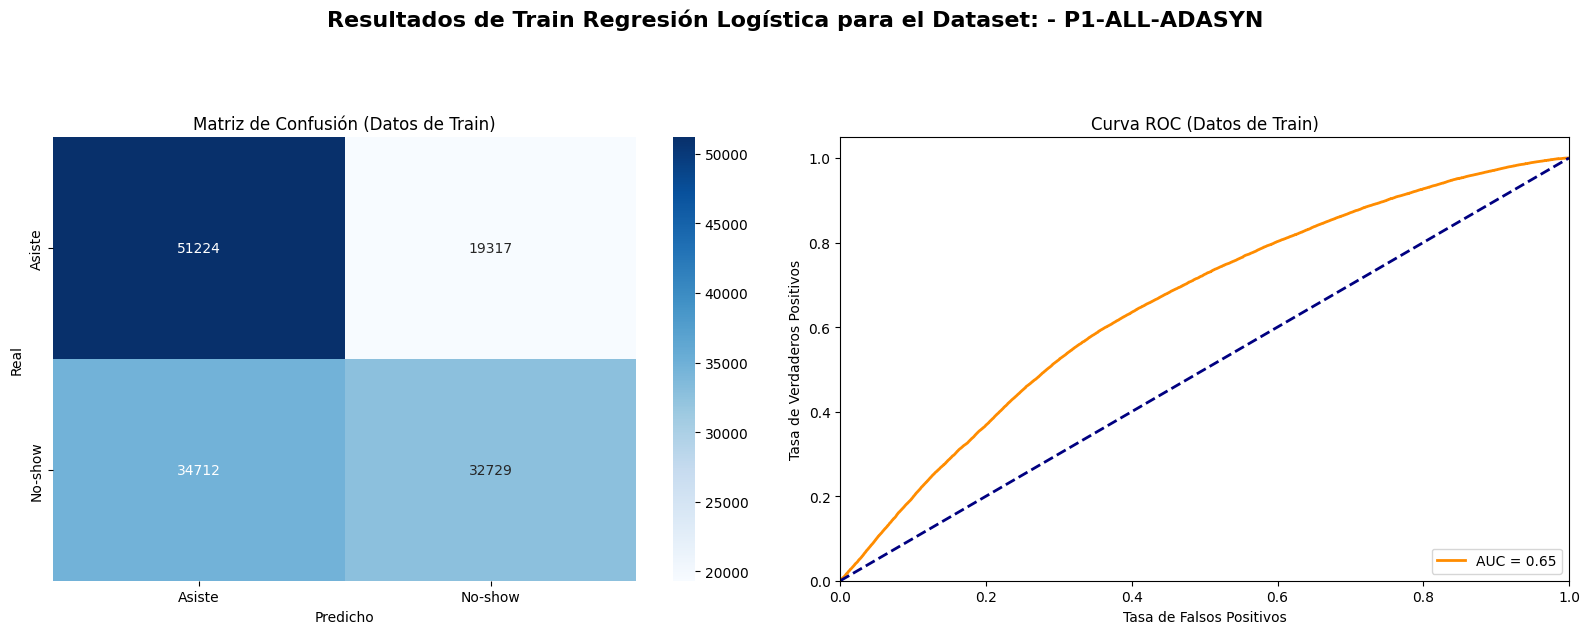

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6468298864099199
Precision (Datos de Test): 0.30763033720796407
Recall (Datos de Test): 0.5991930060524546
F1 Score (Datos de Test): 0.4065399239543726
[[11620  6016]
 [ 1788  2673]]


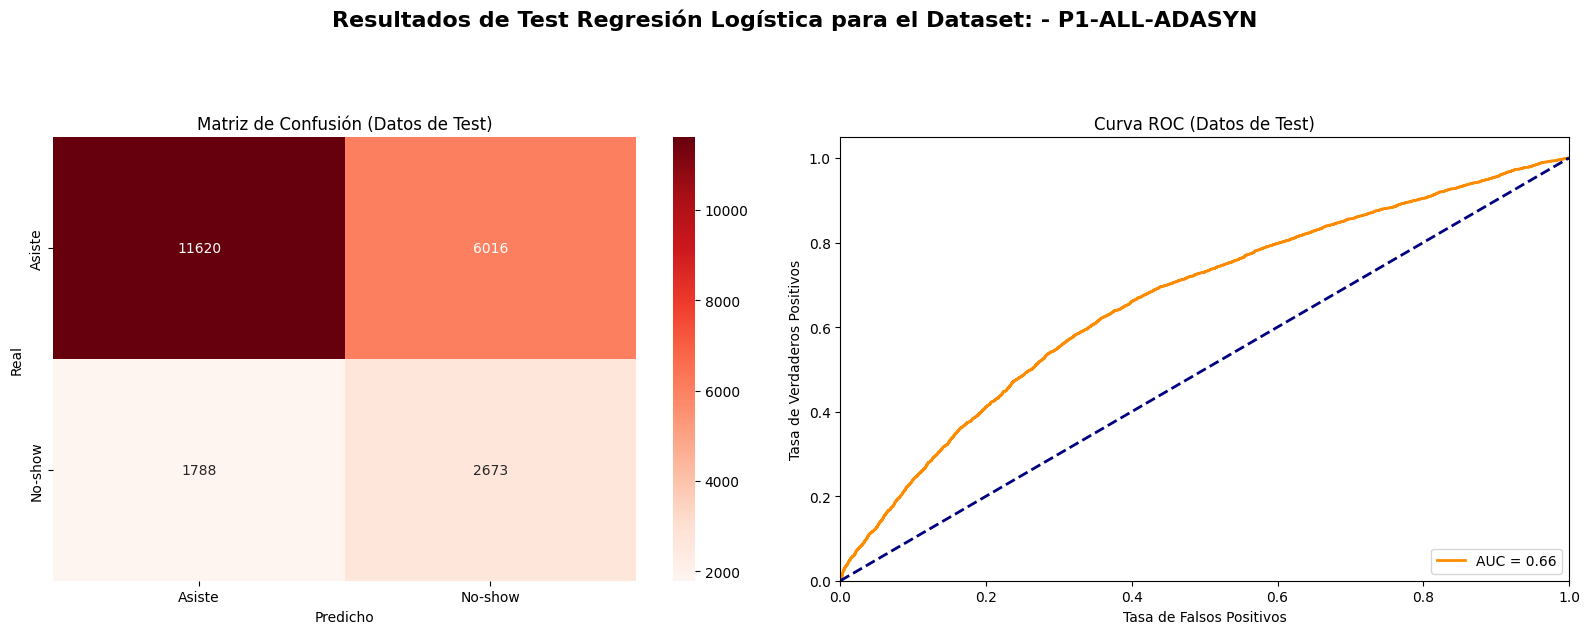

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.9512472641359018
Precision (Datos de Train): 0.9784698798978659
Recall (Datos de Train): 0.92050829614033
F1 Score (Datos de Train): 0.9486045214574403
[[69175  1366]
 [ 5361 62080]]


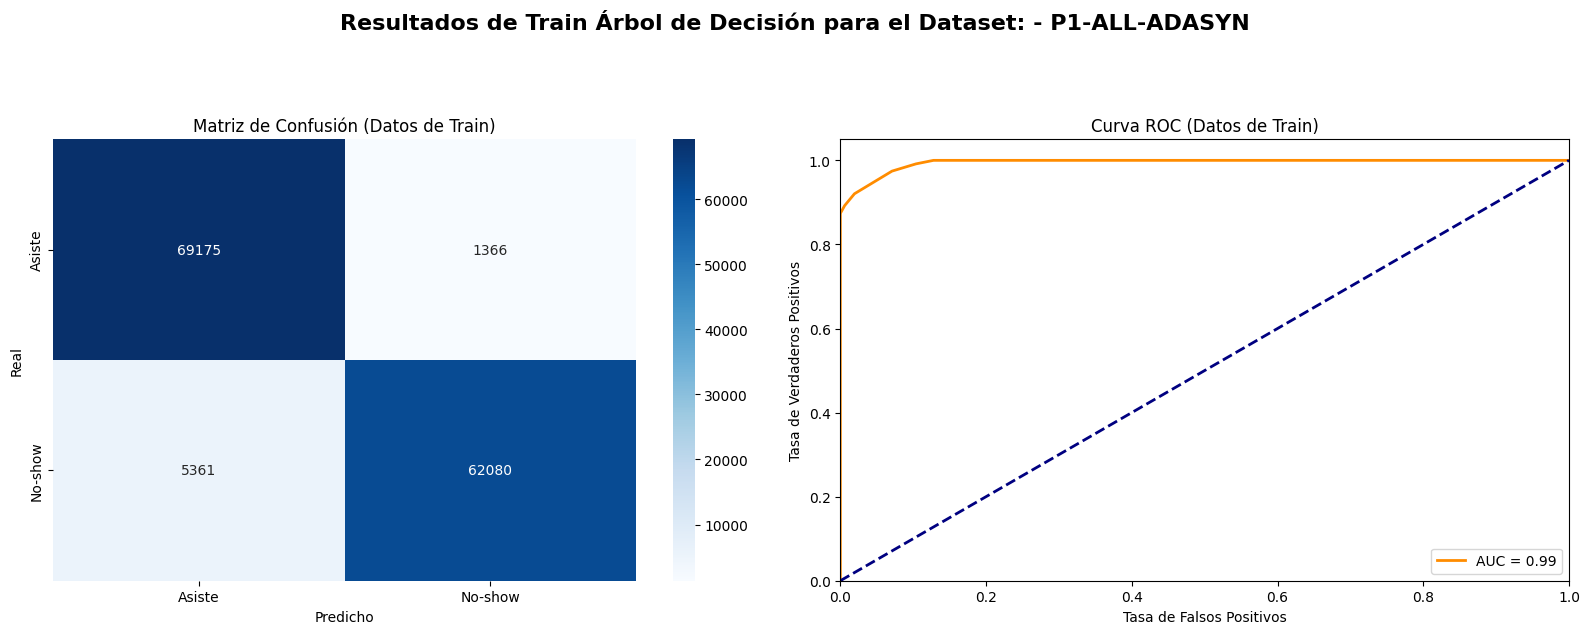

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7089197628637371
Precision (Datos de Test): 0.28991686207631634
Recall (Datos de Test): 0.3048643801838153
F1 Score (Datos de Test): 0.2972027972027972
[[14305  3331]
 [ 3101  1360]]


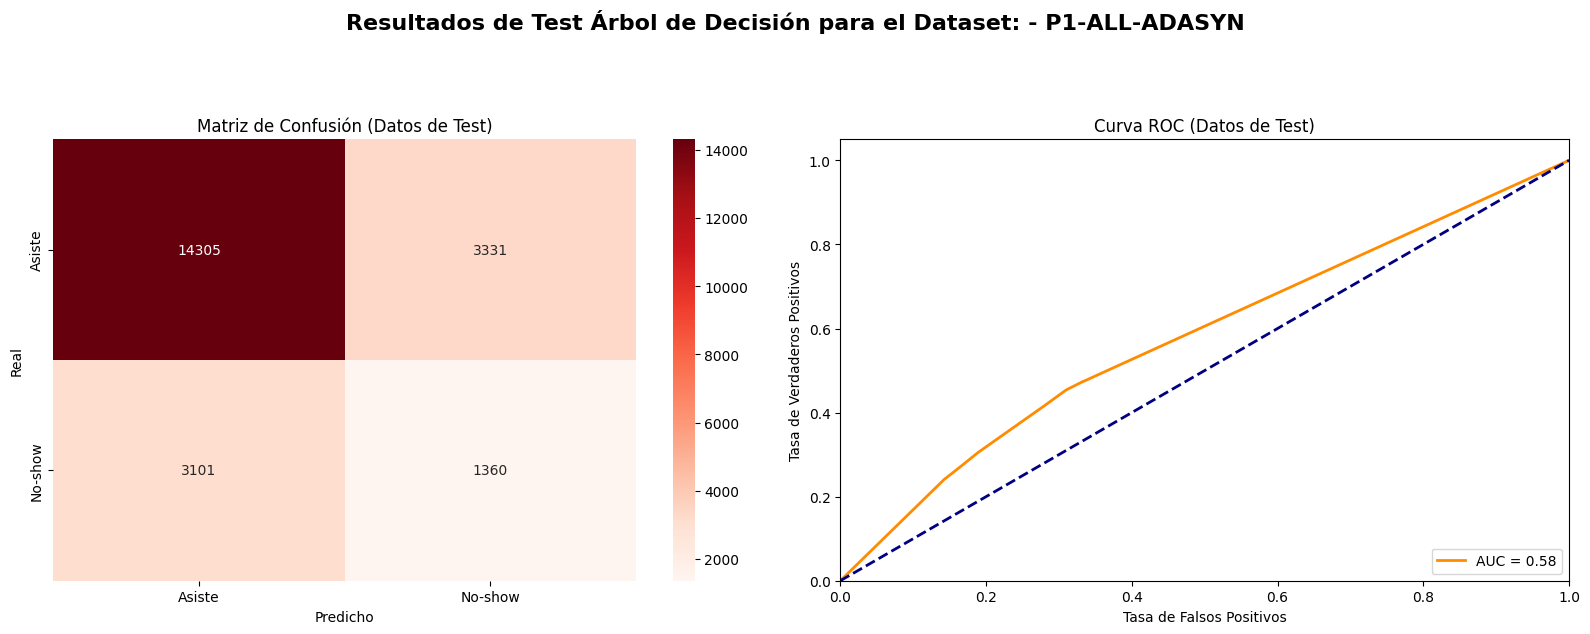

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6829513994579003
Precision (Datos de Train): 0.6315368729598294
Recall (Datos de Train): 0.8434038641182663
F1 Score (Datos de Train): 0.7222536141250865
[[37355 33186]
 [10561 56880]]


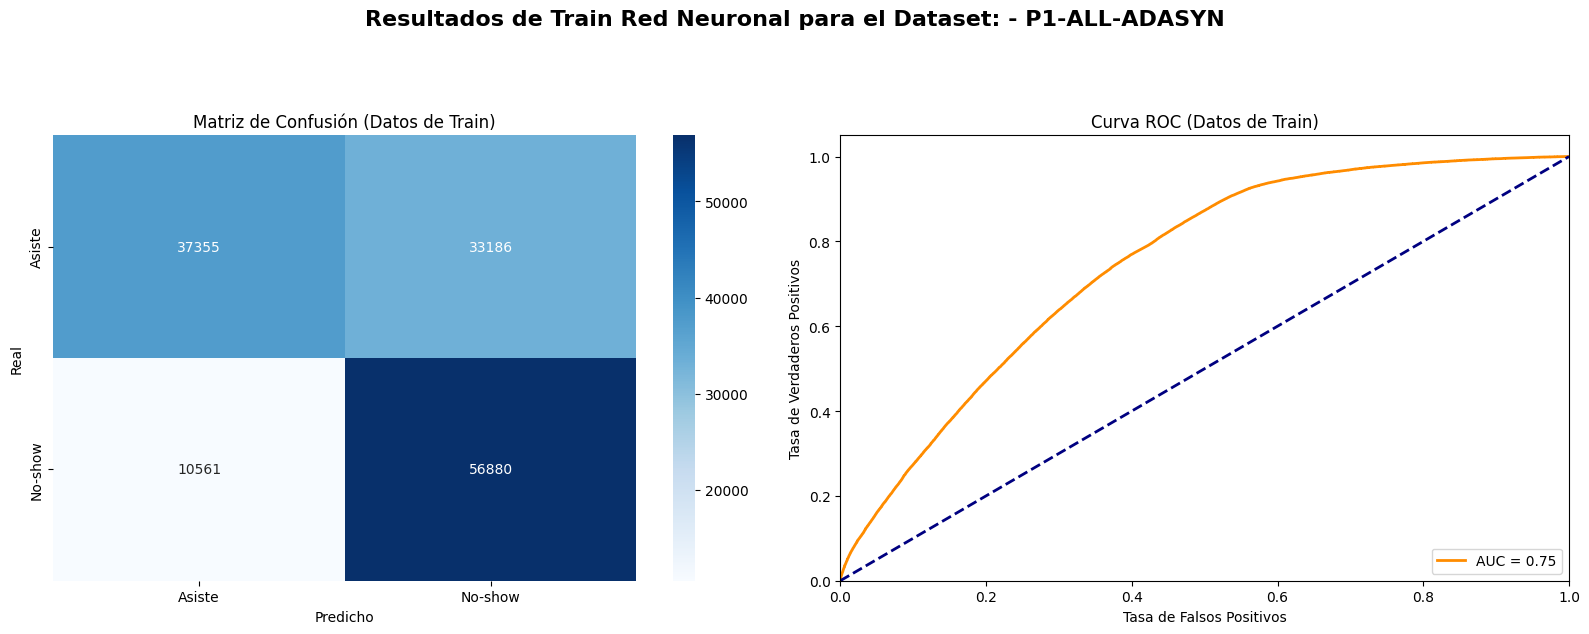

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.5331492962845635
Precision (Datos de Test): 0.2787393243141108
Recall (Datos de Test): 0.8267204662631696
F1 Score (Datos de Test): 0.41691159846258197
[[8093 9543]
 [ 773 3688]]


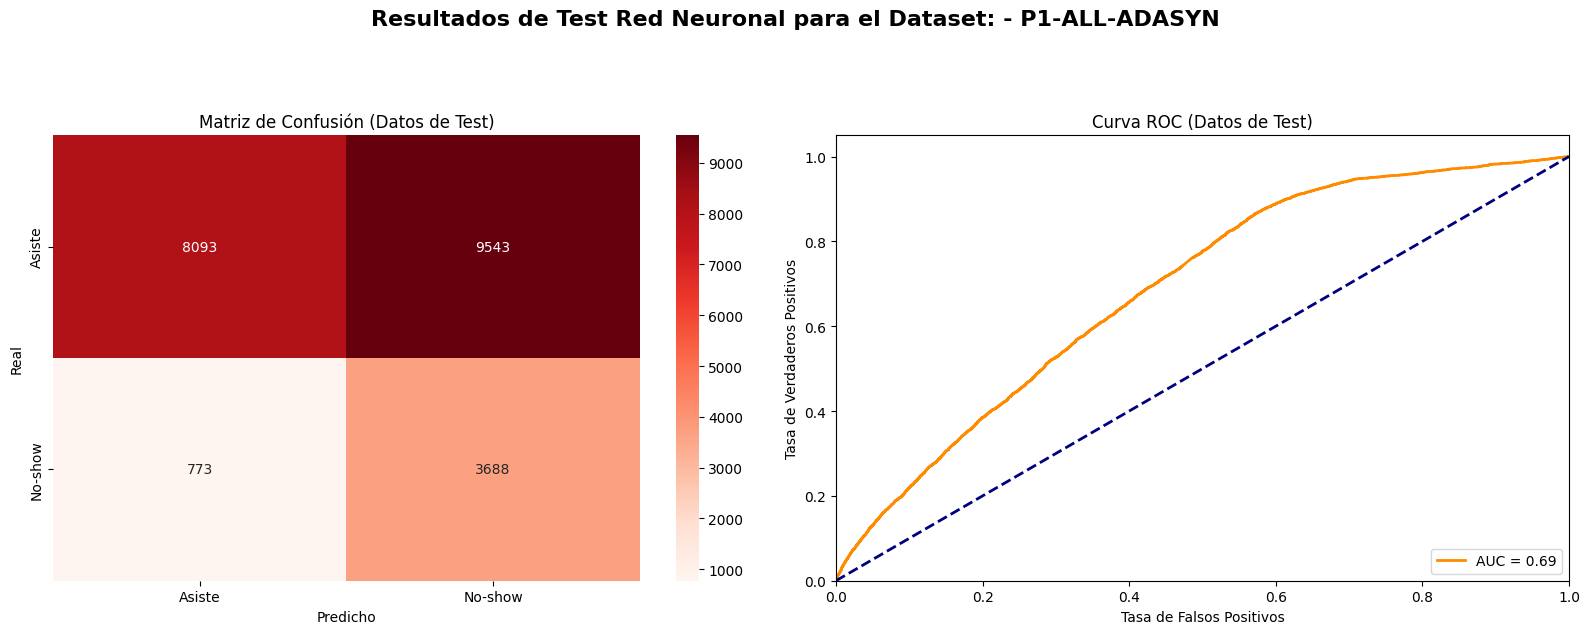


Ejecutando modelo para el dataset: P1-ALL

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6381042132956375
Precision (Datos de Train): 0.6366535694238914
Recall (Datos de Train): 0.439359791527274
F1 Score (Datos de Train): 0.5199191565612368
[[56300 14241]
 [31841 24953]]


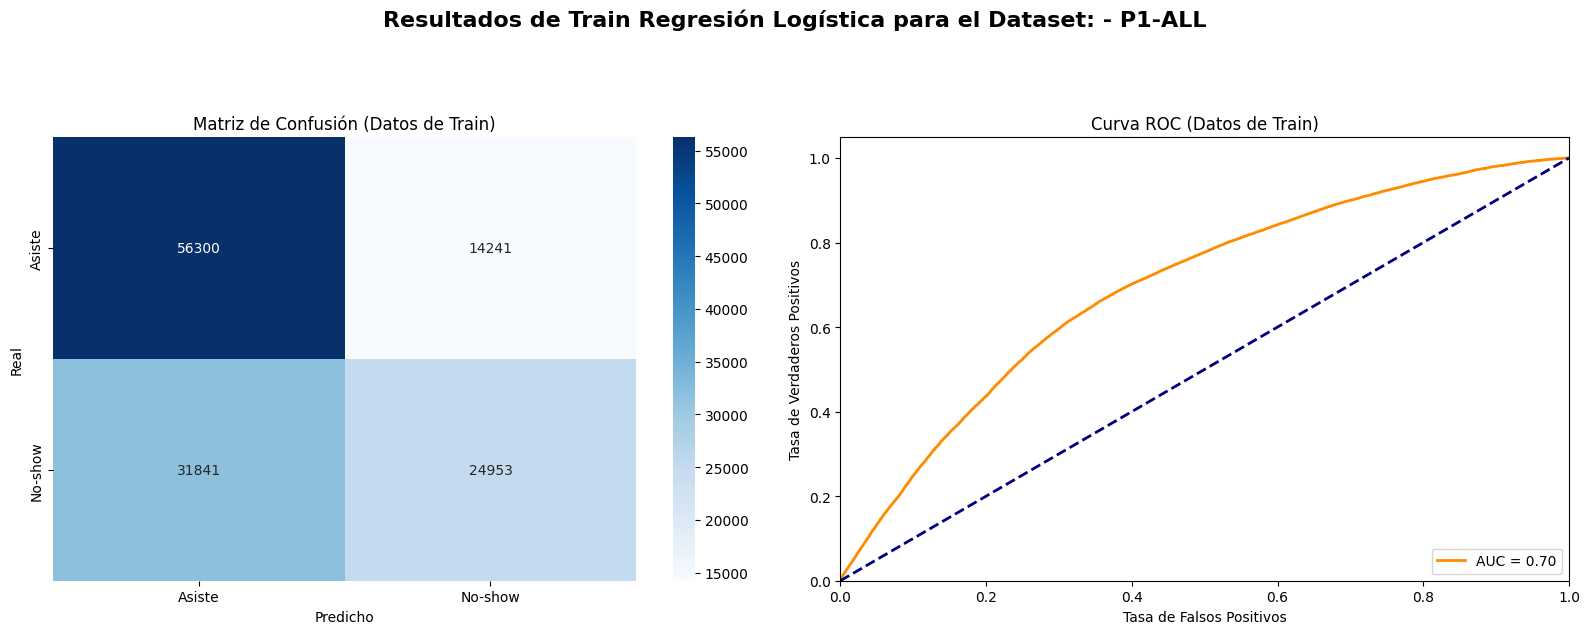

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6786441598407024
Precision (Datos de Test): 0.3205058471580092
Recall (Datos de Test): 0.5283568706568034
F1 Score (Datos de Test): 0.39898434193821414
[[12639  4997]
 [ 2104  2357]]


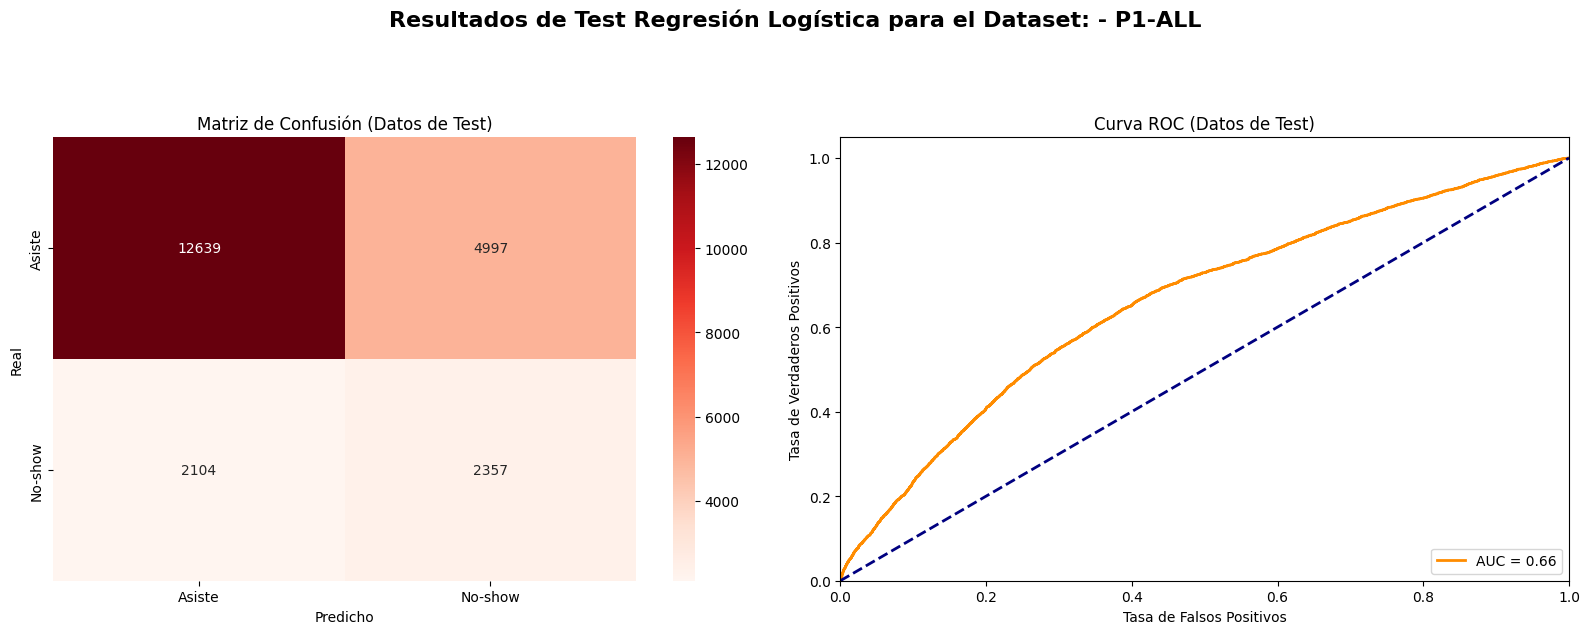

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.9647622413319198
Precision (Datos de Train): 0.9875109512181482
Recall (Datos de Train): 0.9327921963587703
F1 Score (Datos de Train): 0.9593719723653353
[[69871   670]
 [ 3817 52977]]


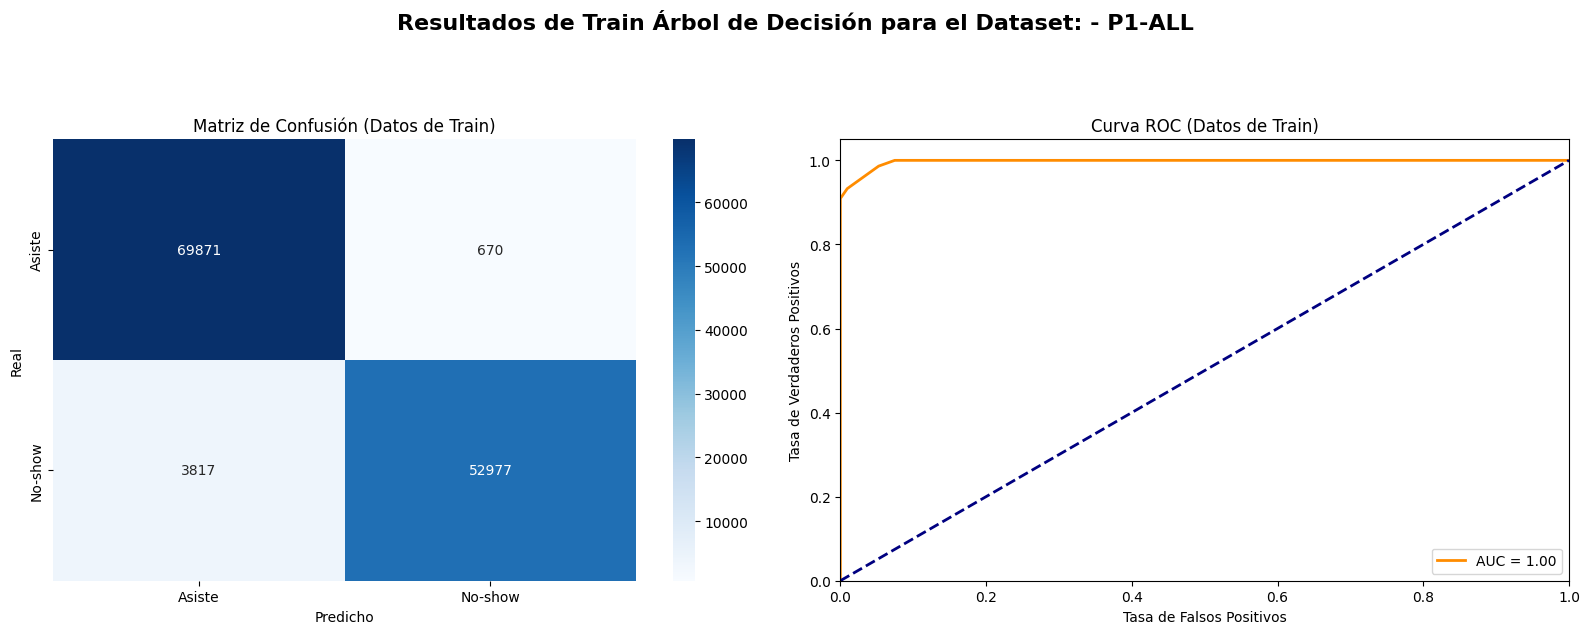

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7280173779246052
Precision (Datos de Test): 0.3021711366538953
Recall (Datos de Test): 0.26518717776283346
F1 Score (Datos de Test): 0.28247373447946517
[[14904  2732]
 [ 3278  1183]]


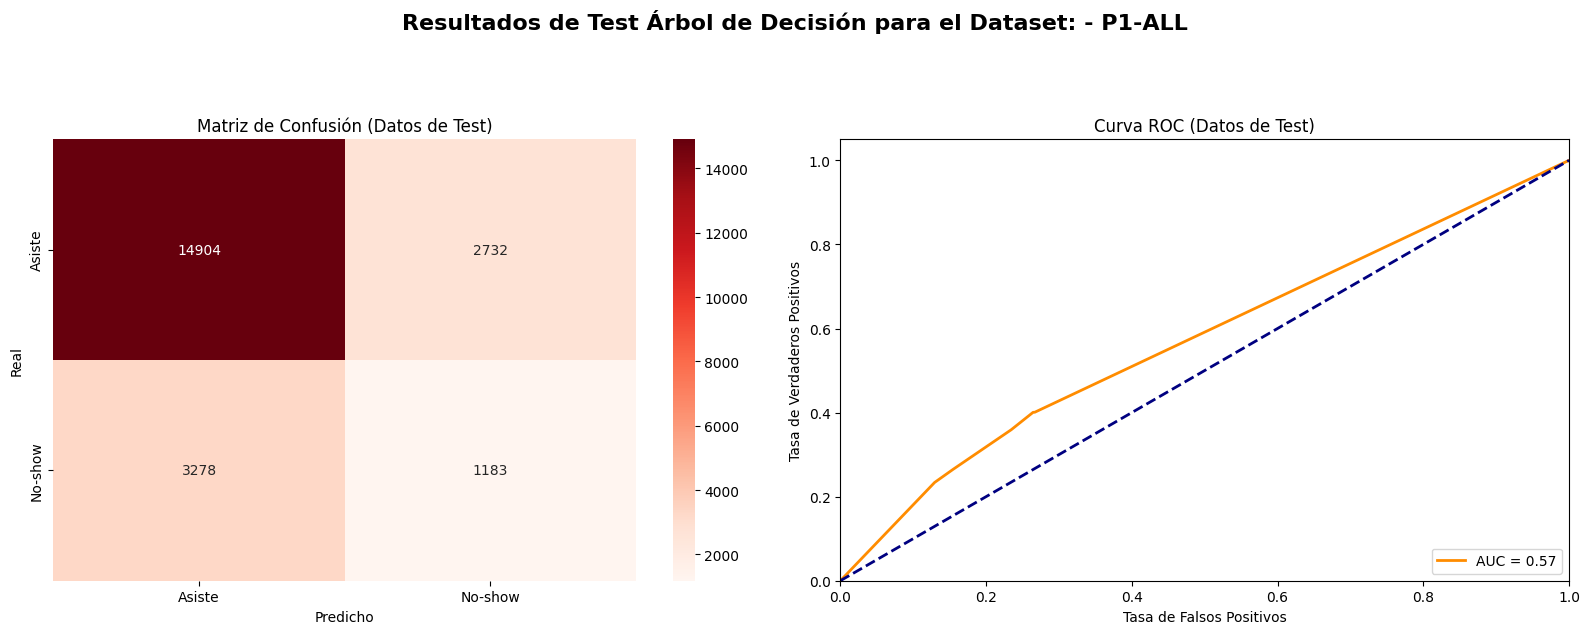

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7112184395492206
Precision (Datos de Train): 0.648641425389755
Recall (Datos de Train): 0.769200971933655
F1 Score (Datos de Train): 0.7037955922154917
[[46877 23664]
 [13108 43686]]


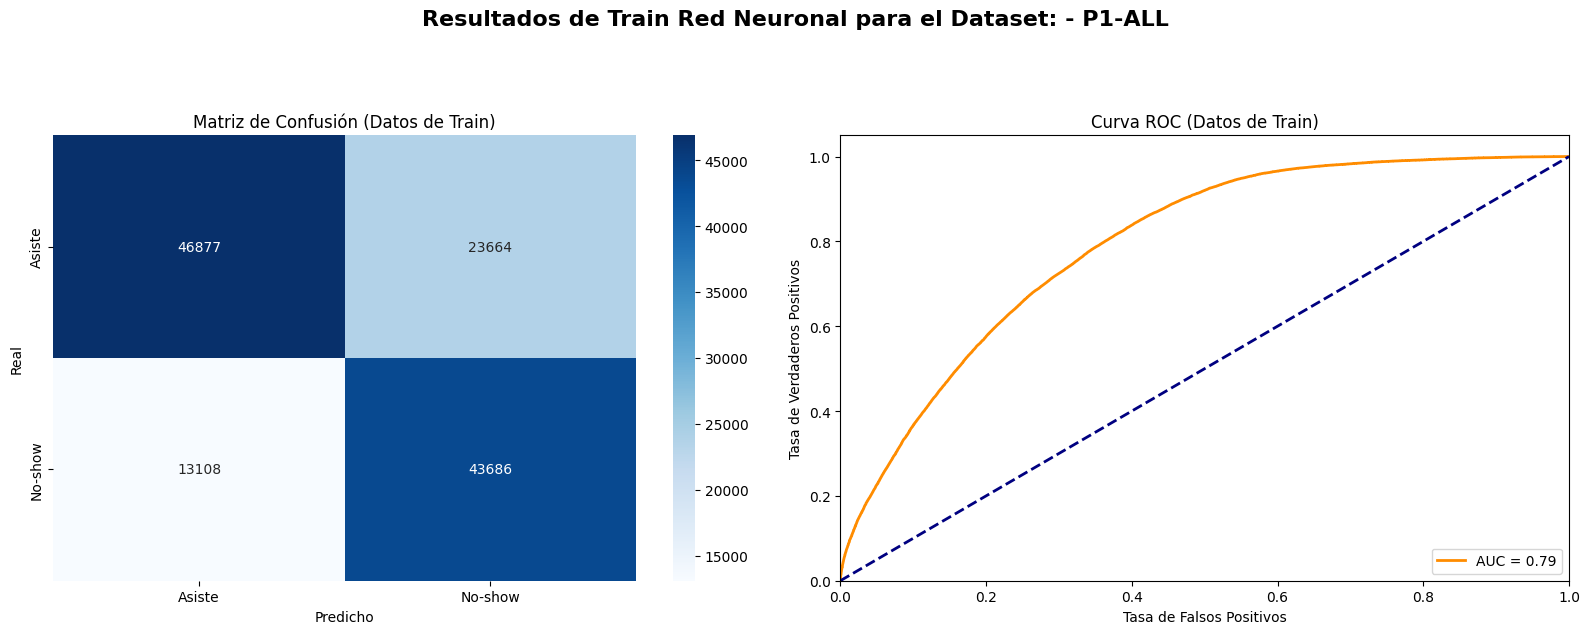

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.5938362673666109
Precision (Datos de Test): 0.2867132867132867
Recall (Datos de Test): 0.6801165657924232
F1 Score (Datos de Test): 0.4033769859735425
[[10088  7548]
 [ 1427  3034]]


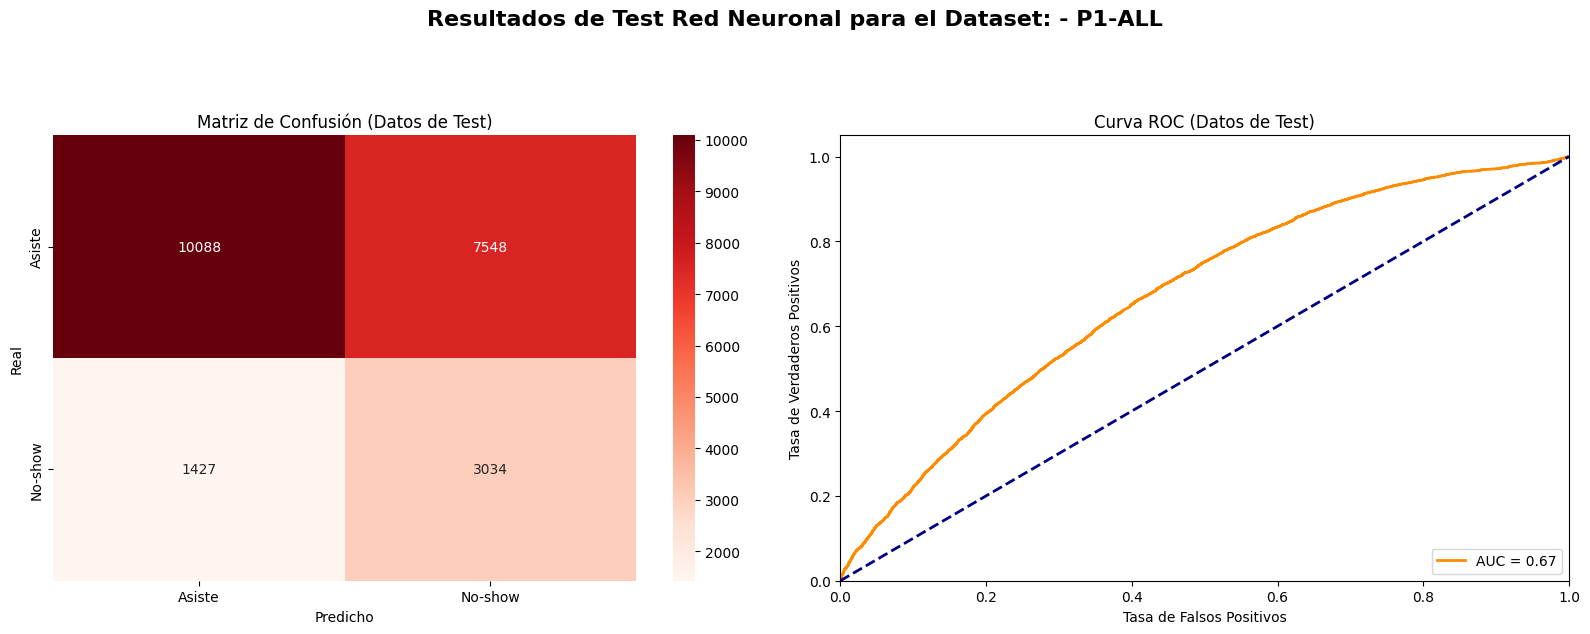


Ejecutando modelo para el dataset: P2-NOCONDITIONS

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6393377261090359
Precision (Datos de Train): 0.6319740658590685
Recall (Datos de Train): 0.43981096677669856
F1 Score (Datos de Train): 0.5186658078247962
[[42414 10785]
 [23589 18520]]


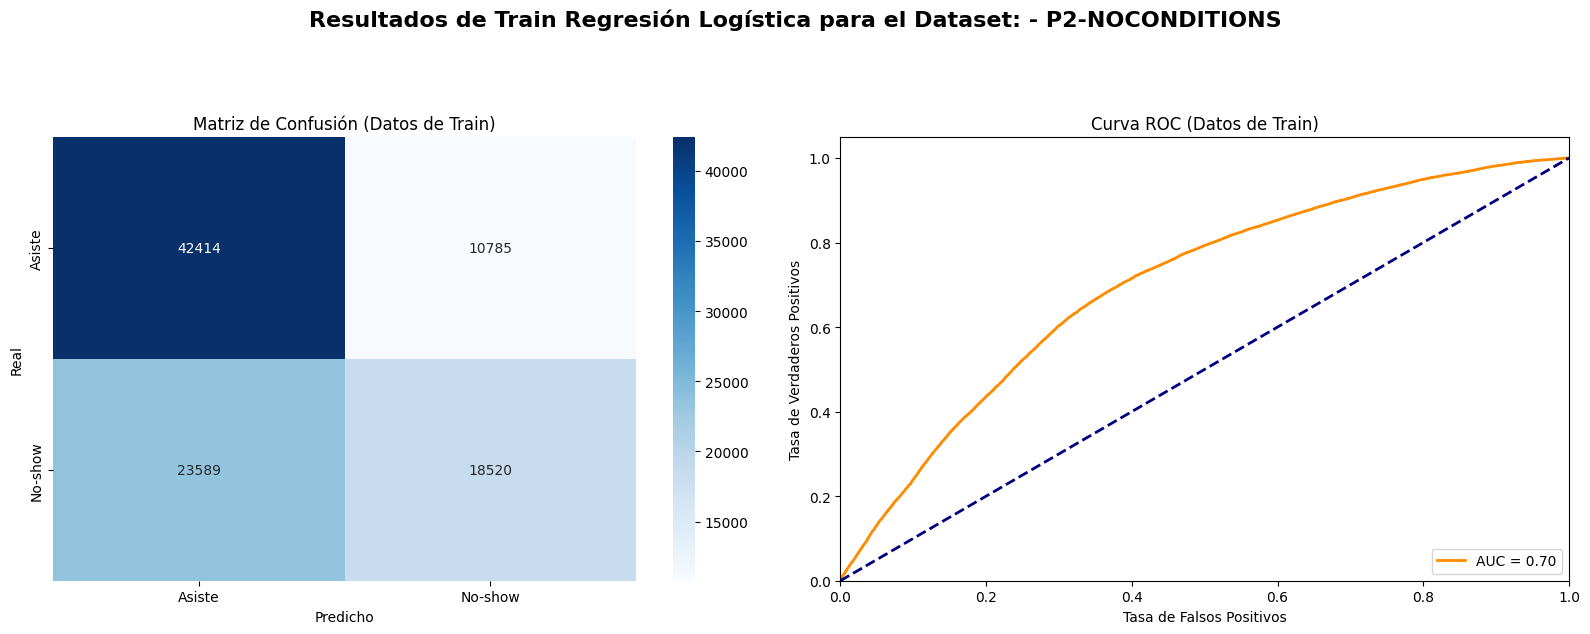

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6768535584755336
Precision (Datos de Test): 0.3292943692088382
Recall (Datos de Test): 0.525149190110827
F1 Score (Datos de Test): 0.4047749425035593
[[9536 3764]
 [1671 1848]]


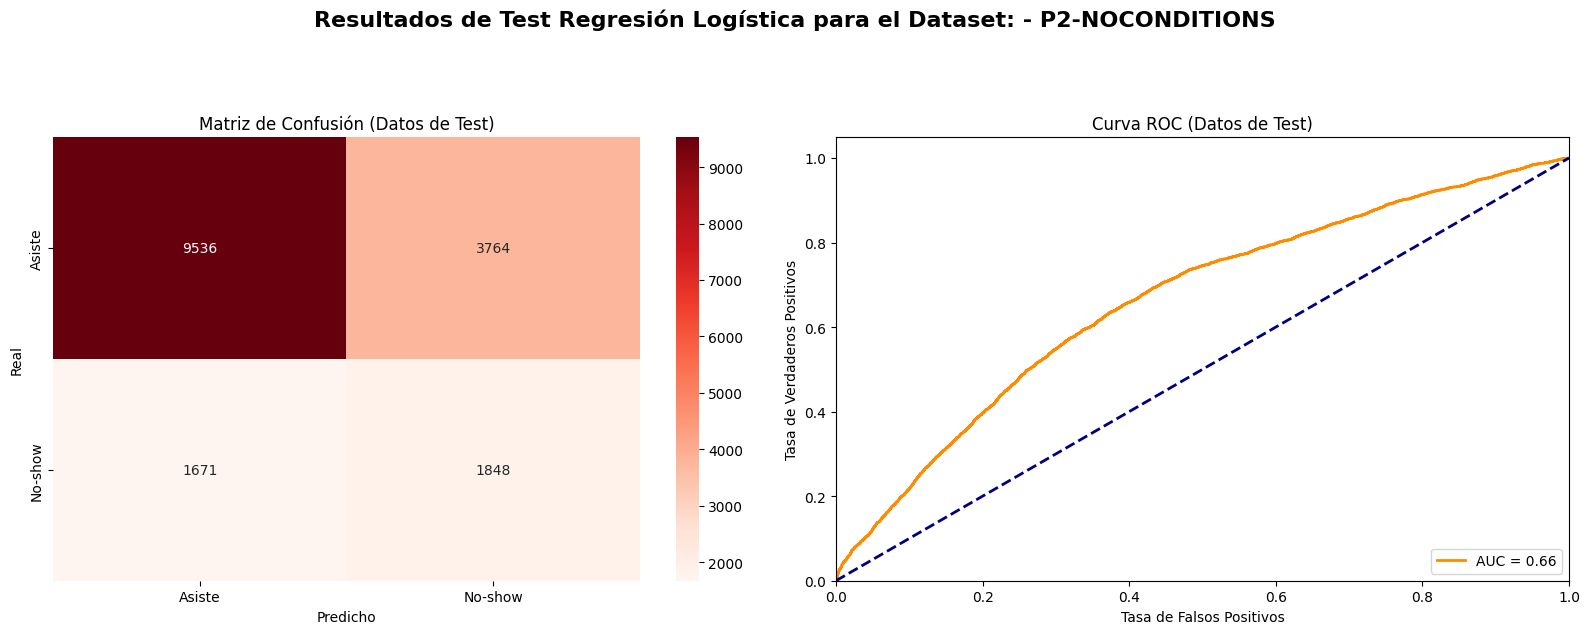

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.963875015738448
Precision (Datos de Train): 0.9872964661995262
Recall (Datos de Train): 0.9302049443111924
F1 Score (Datos de Train): 0.9579007862269665
[[52695   504]
 [ 2939 39170]]


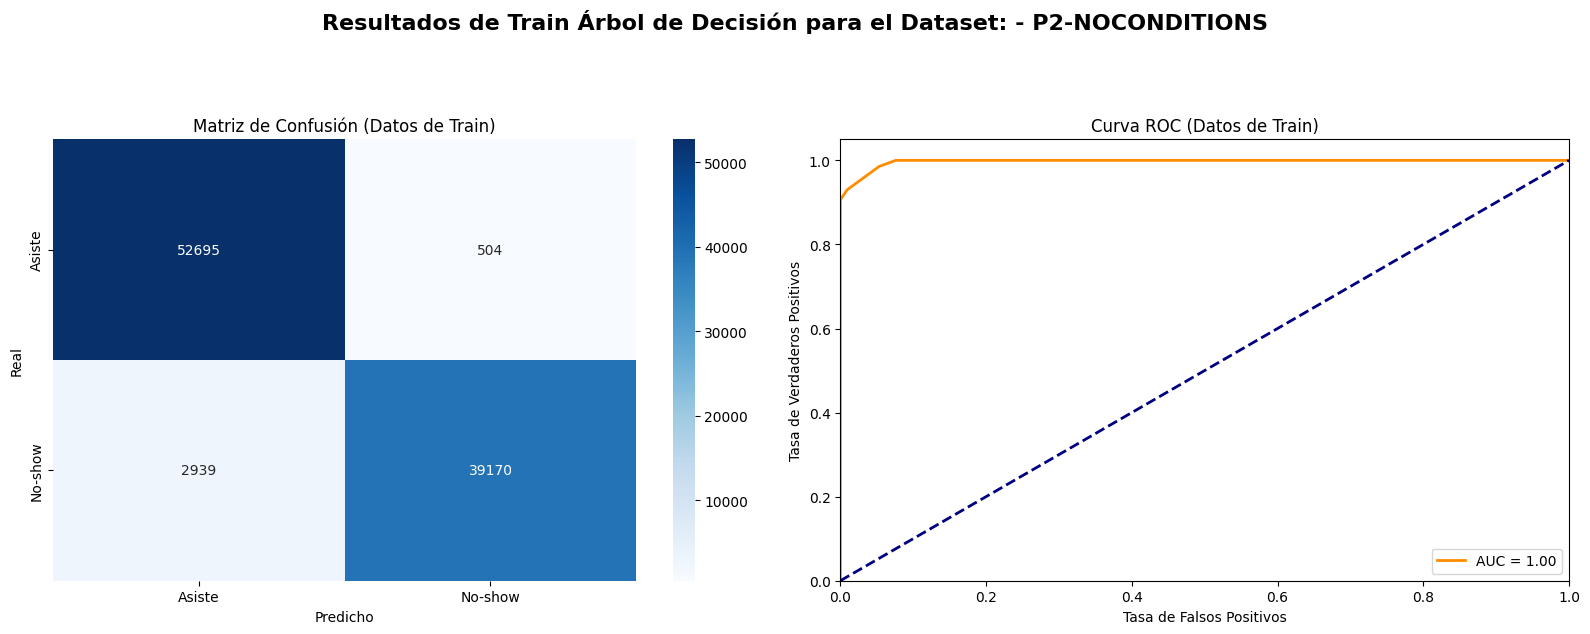

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7197811998335216
Precision (Datos de Test): 0.31308703819661865
Recall (Datos de Test): 0.2841716396703609
F1 Score (Datos de Test): 0.29792939073439595
[[11106  2194]
 [ 2519  1000]]


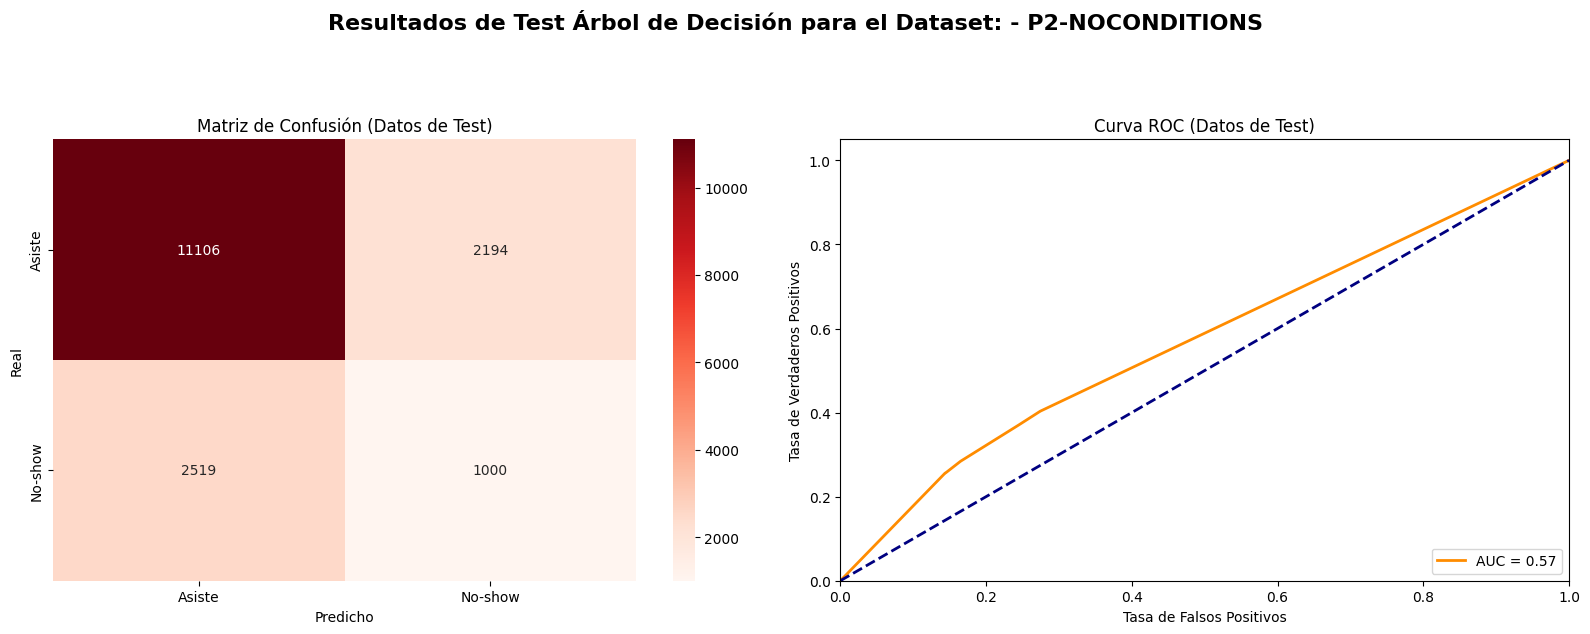

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7192155957527175
Precision (Datos de Train): 0.6588359481723723
Recall (Datos de Train): 0.7559191621743571
F1 Score (Datos de Train): 0.7040465368324431
[[36716 16483]
 [10278 31831]]


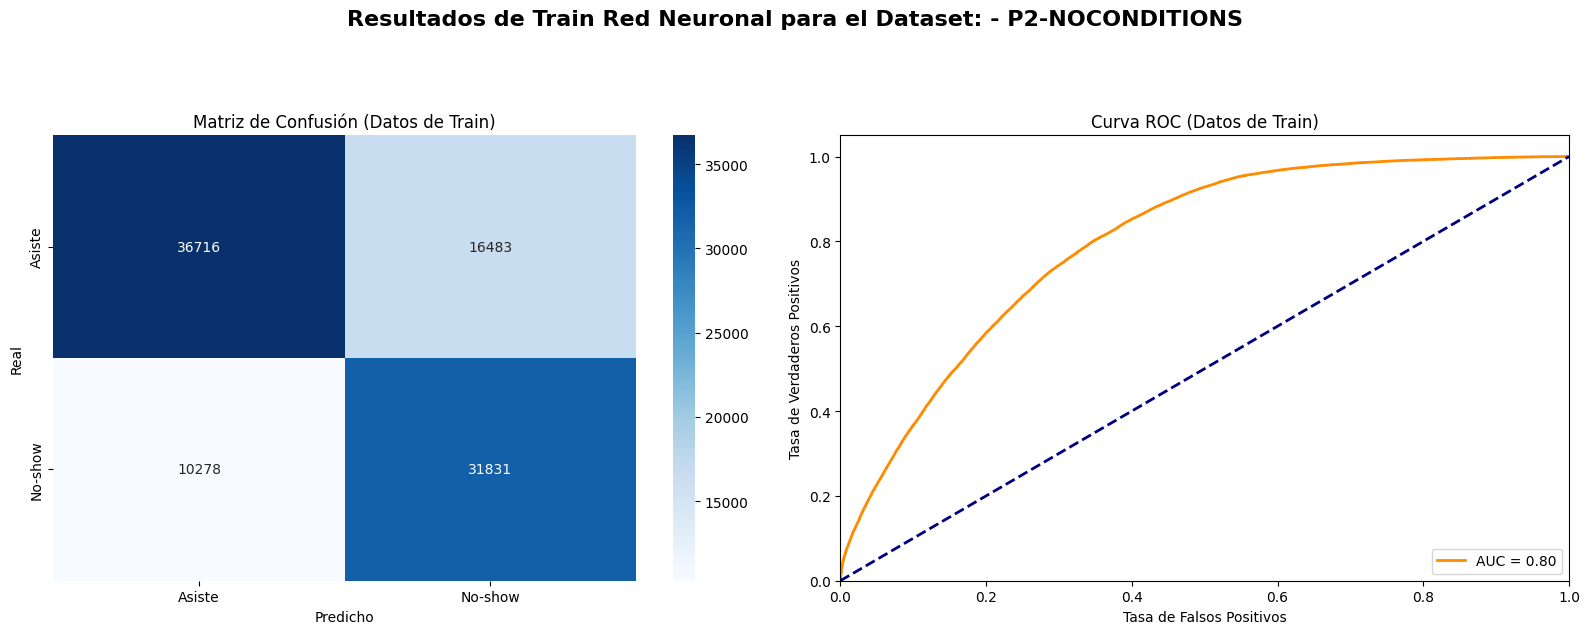

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6172780783637553
Precision (Datos de Test): 0.3106178608515057
Recall (Datos de Test): 0.6800227337311736
F1 Score (Datos de Test): 0.4264456918827408
[[7989 5311]
 [1126 2393]]


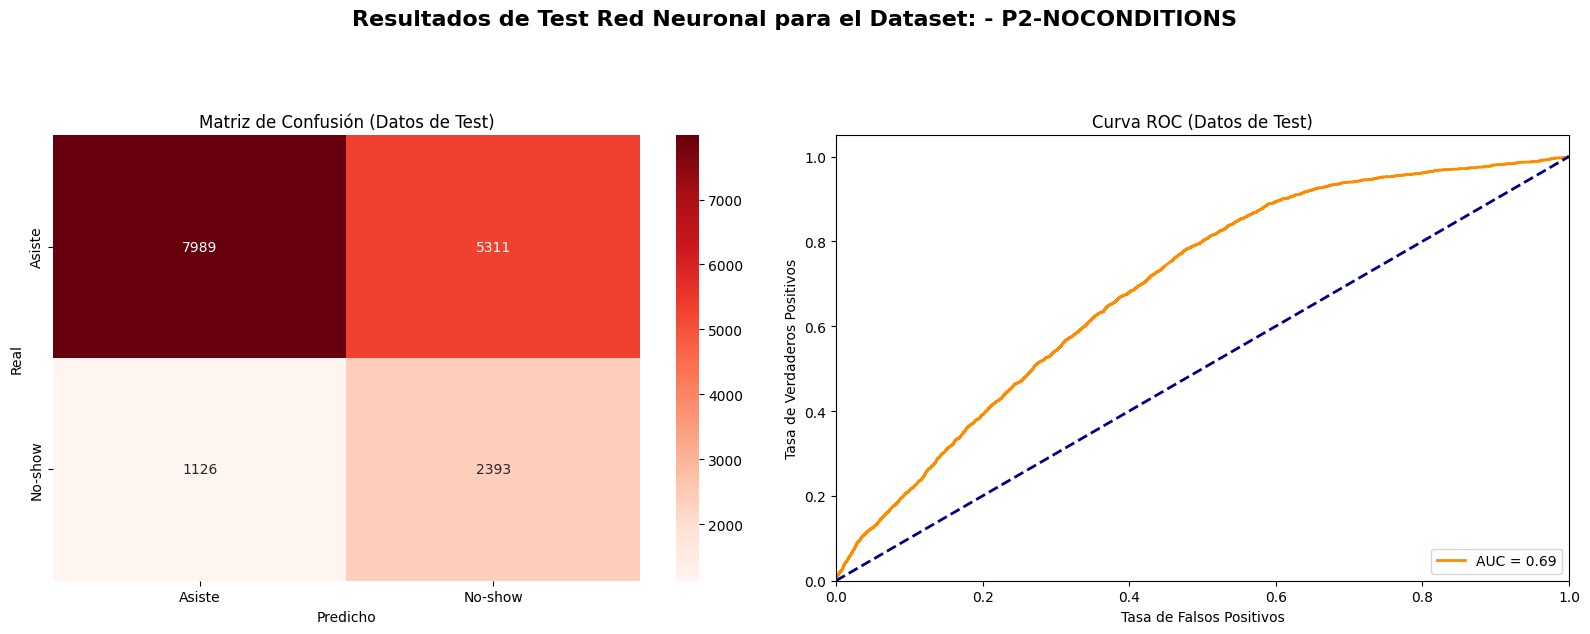


Ejecutando modelo para el dataset: P3-AGE

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6435621786588216
Precision (Datos de Train): 0.6316497712388983
Recall (Datos de Train): 0.44285804138625073
F1 Score (Datos de Train): 0.5206684907195149
[[16366  4106]
 [ 8858  7041]]


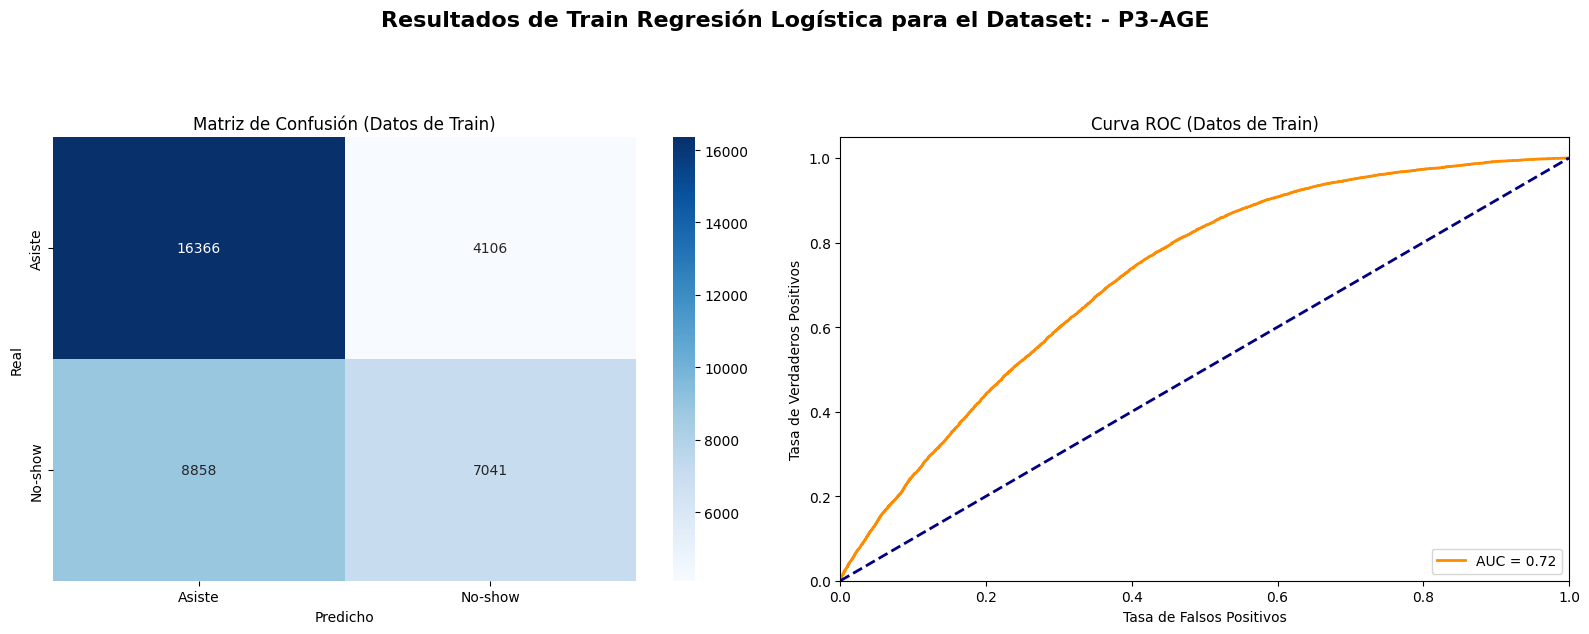

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6860893937158873
Precision (Datos de Test): 0.39581478183437224
Recall (Datos de Test): 0.5355421686746988
F1 Score (Datos de Test): 0.4551971326164875
[[3762 1357]
 [ 771  889]]


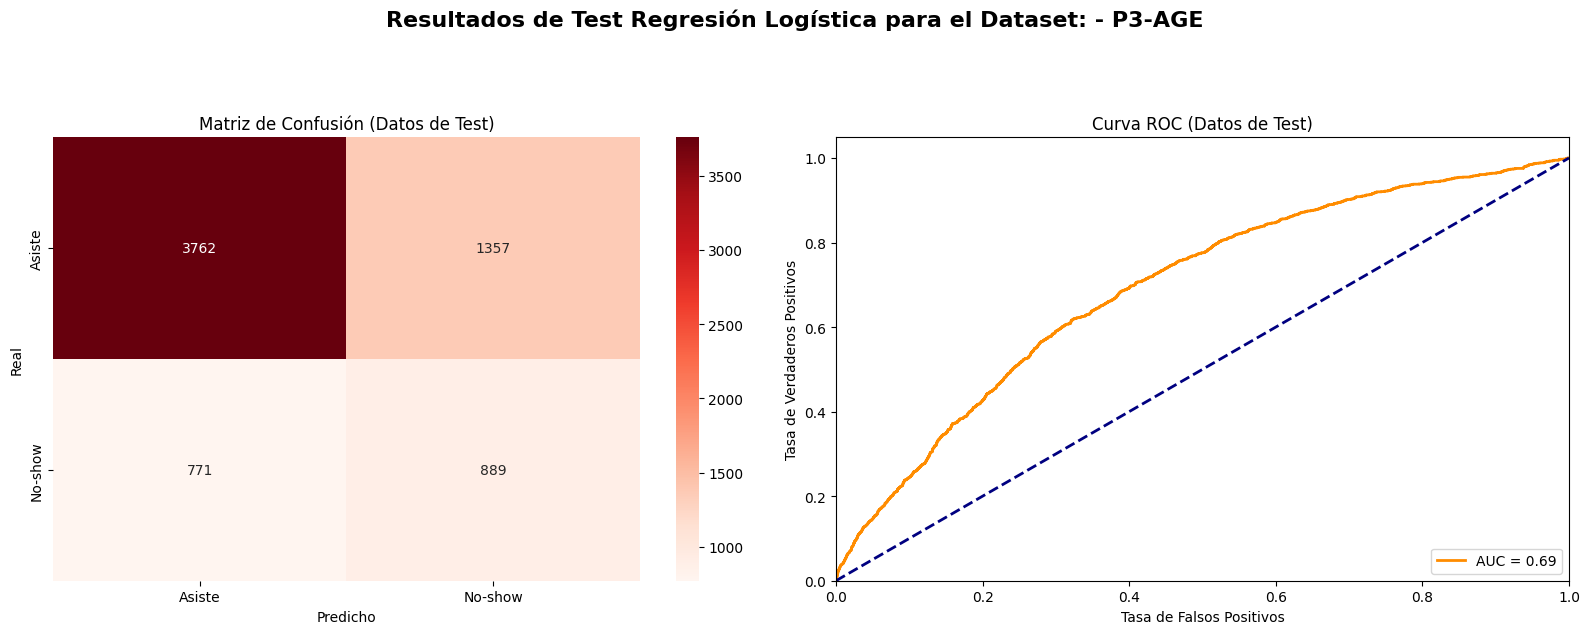

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.9643947100712106
Precision (Datos de Train): 0.9810276679841897
Recall (Datos de Train): 0.9366626831876219
F1 Score (Datos de Train): 0.9583319926638566
[[20184   288]
 [ 1007 14892]]


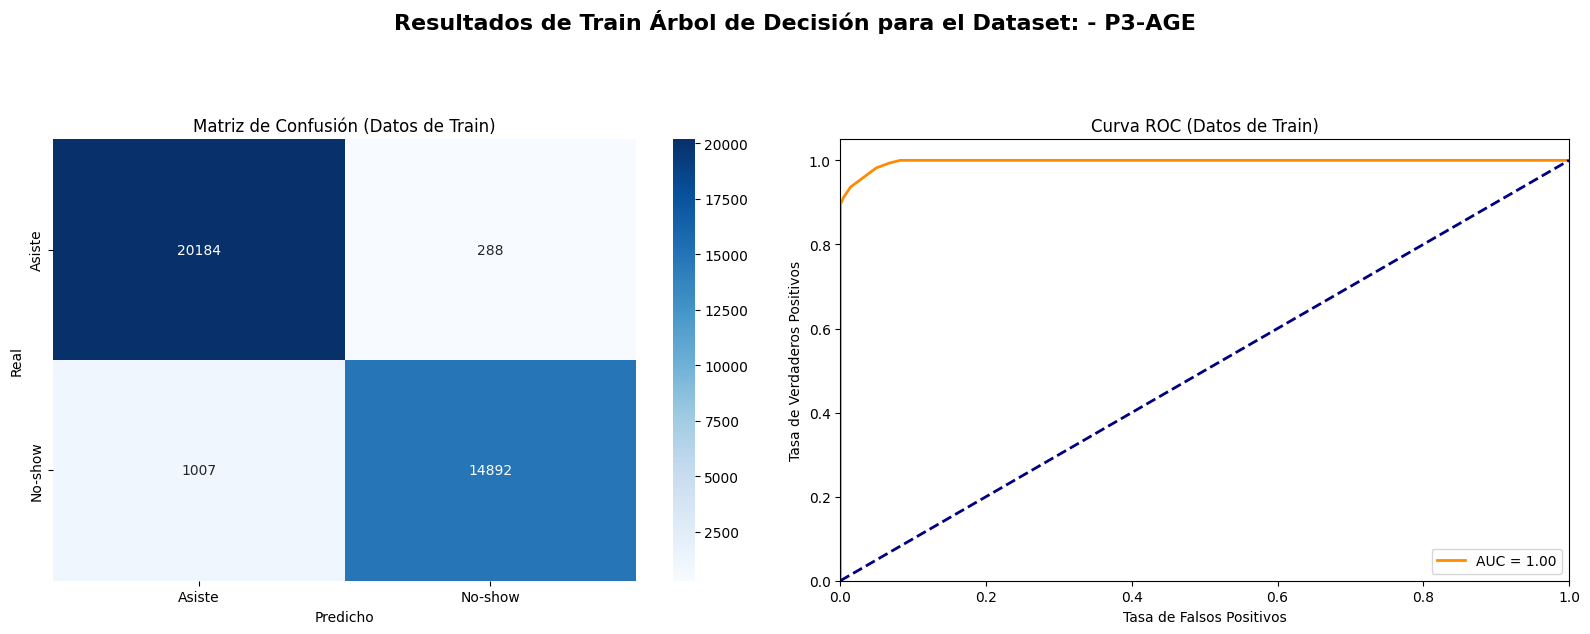

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7074789792004721
Precision (Datos de Test): 0.36923076923076925
Recall (Datos de Test): 0.2746987951807229
F1 Score (Datos de Test): 0.3150259067357513
[[4340  779]
 [1204  456]]


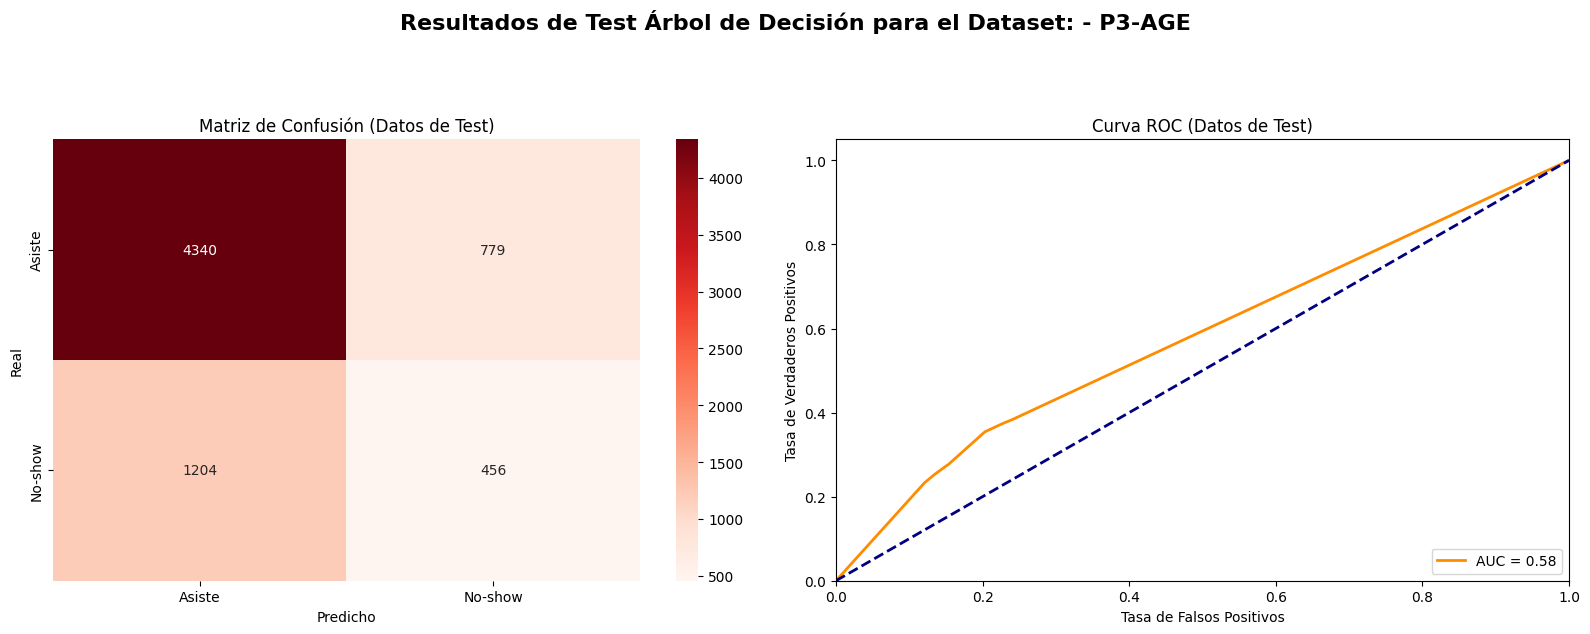

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7213989167193643
Precision (Datos de Train): 0.6471218616044091
Recall (Datos de Train): 0.7975973331656079
F1 Score (Datos de Train): 0.7145231722777856
[[13557  6915]
 [ 3218 12681]]


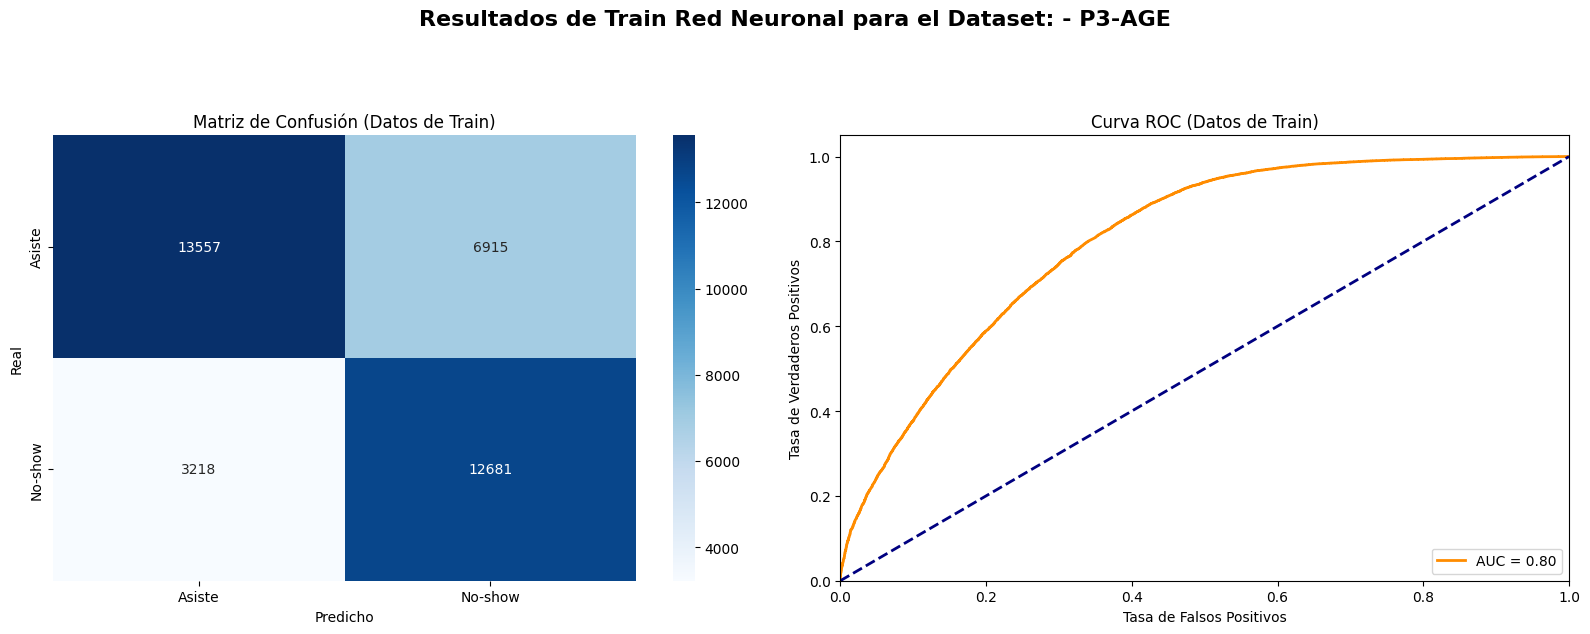

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6205930078182623
Precision (Datos de Test): 0.3562421185372005
Recall (Datos de Test): 0.6807228915662651
F1 Score (Datos de Test): 0.46771523178807944
[[3077 2042]
 [ 530 1130]]


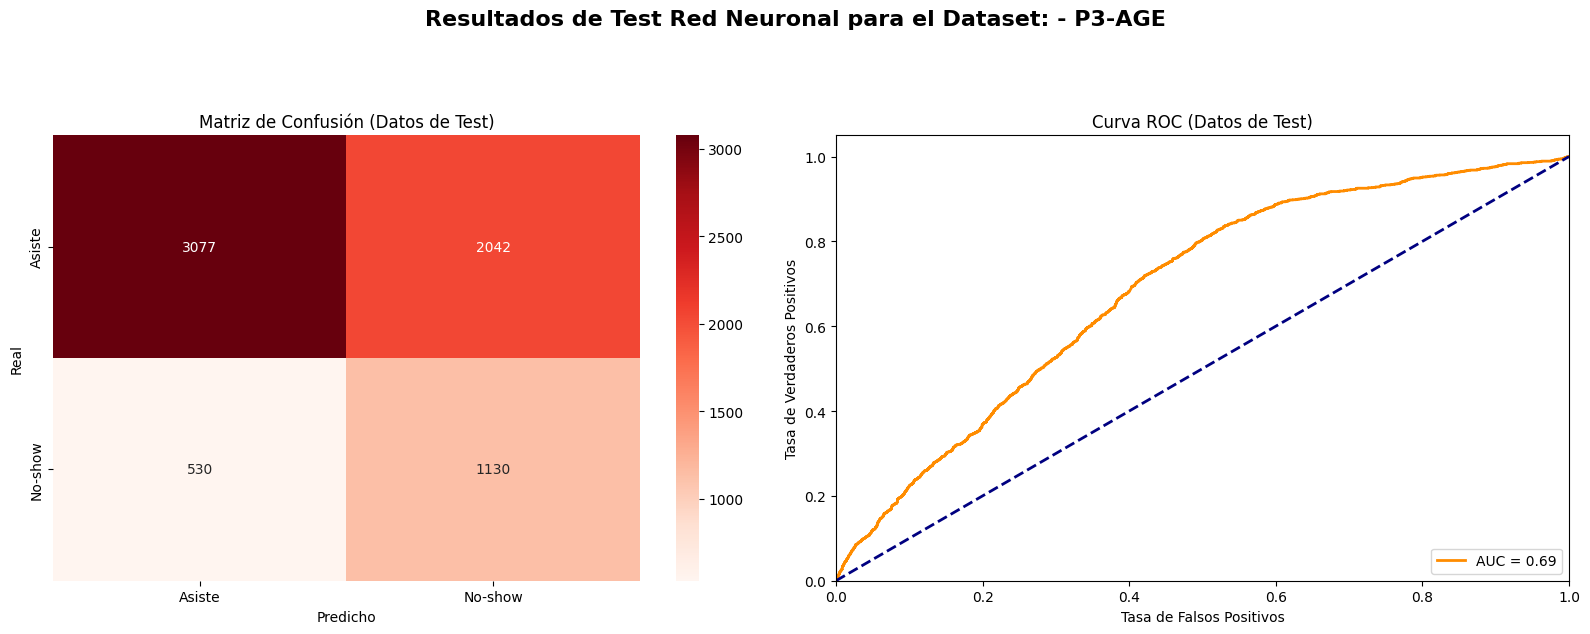


Ejecutando modelo para el dataset: P4-TIME

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6280954655319642
Precision (Datos de Train): 0.5927594397575559
Recall (Datos de Train): 0.25882479167411754
F1 Score (Datos de Train): 0.36031864575553896
[[36160  4972]
 [20724  7237]]


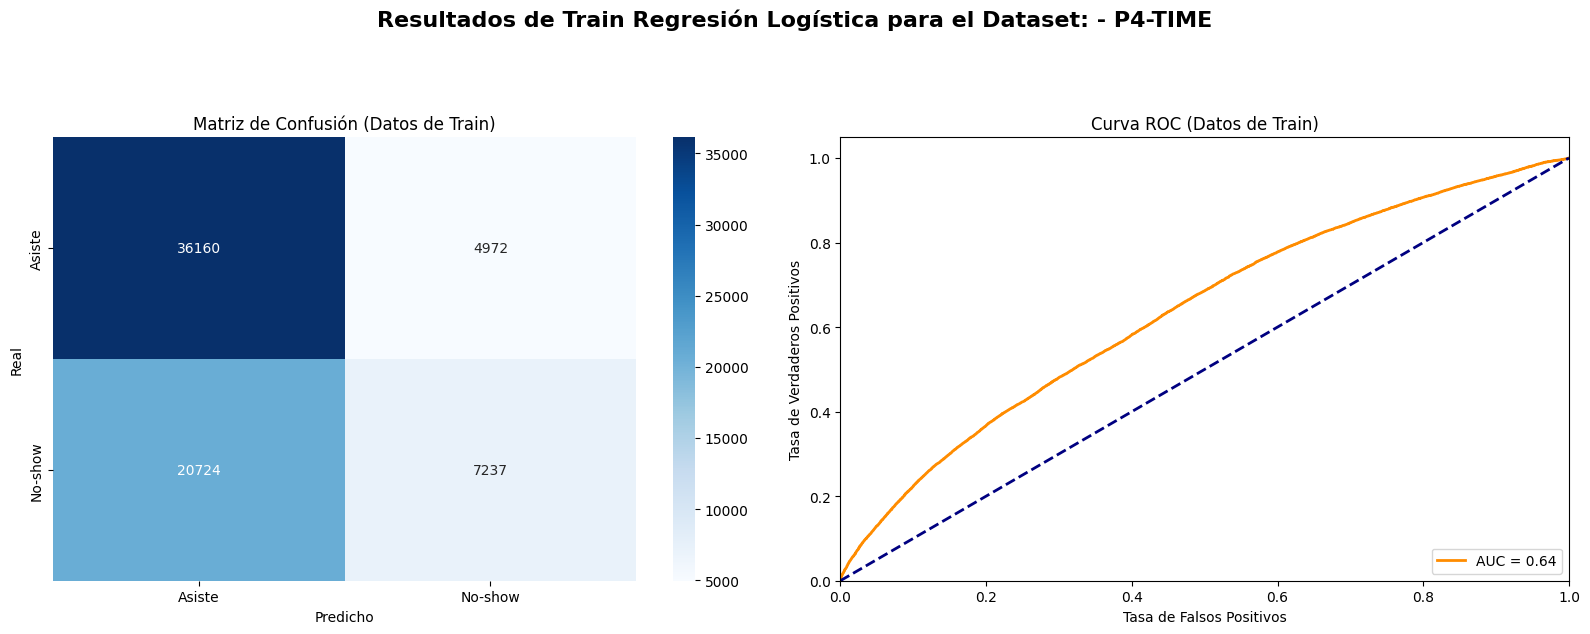

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6758428919012861
Precision (Datos de Test): 0.3924050632911392
Recall (Datos de Test): 0.24939054119941492
F1 Score (Datos de Test): 0.3049634818899985
[[8699 1584]
 [3079 1023]]


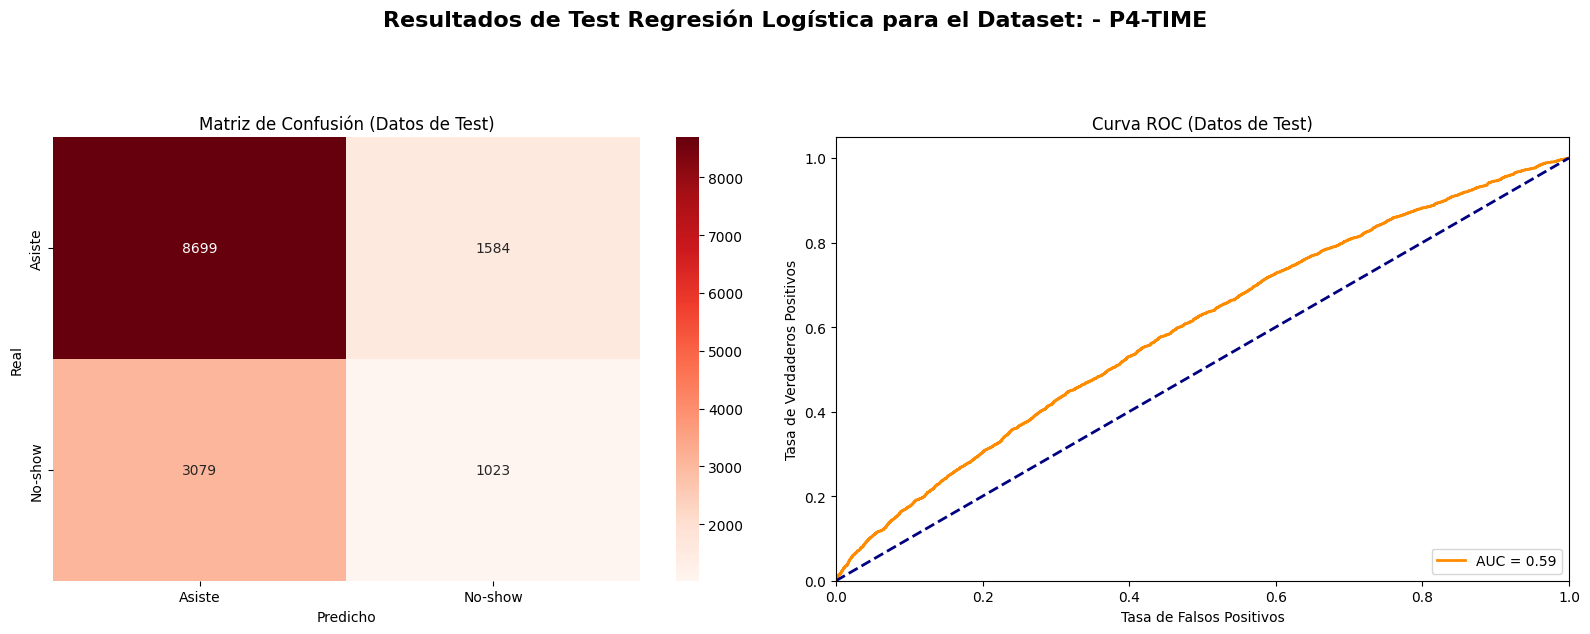

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.9539606038238316
Precision (Datos de Train): 0.9799721081583637
Recall (Datos de Train): 0.9047244376095276
F1 Score (Datos de Train): 0.9408461180846118
[[40615   517]
 [ 2664 25297]]


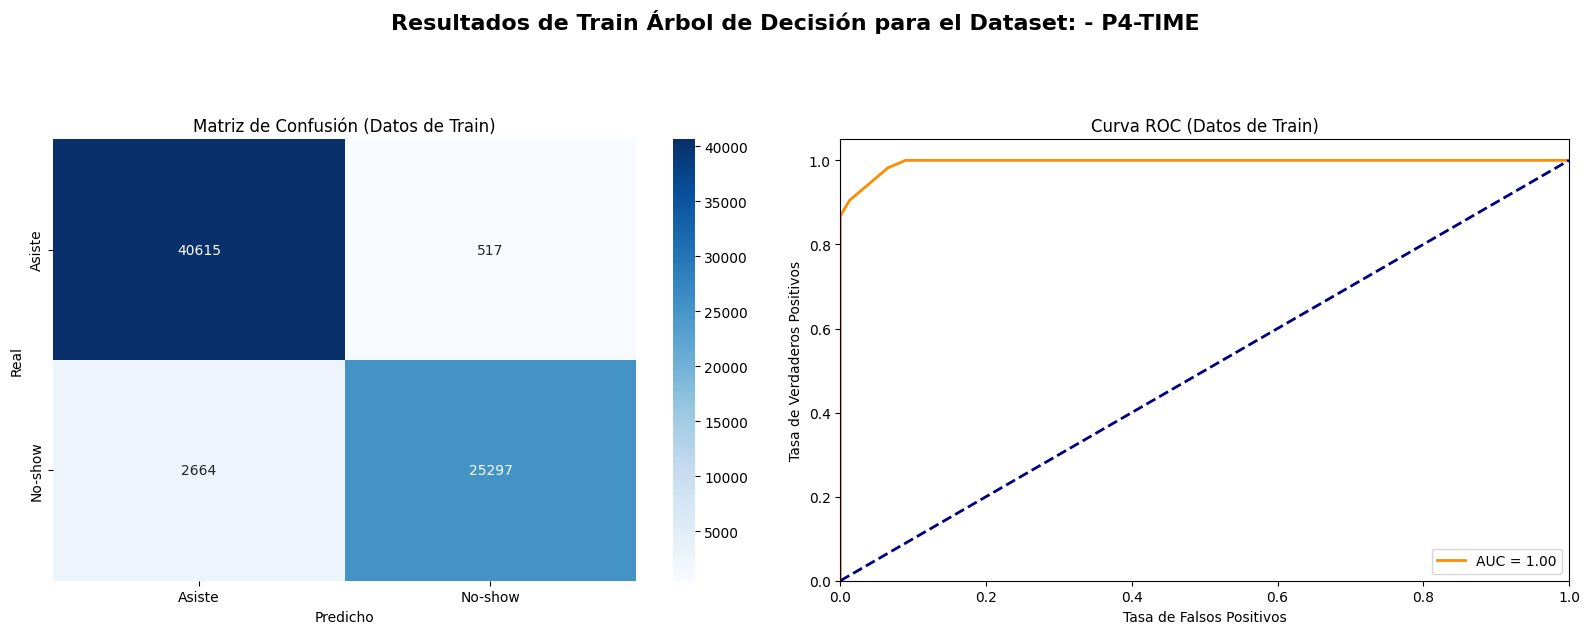

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6375391032325339
Precision (Datos de Test): 0.30463808854532676
Recall (Datos de Test): 0.2113603120429059
F1 Score (Datos de Test): 0.24956822107081175
[[8304 1979]
 [3235  867]]


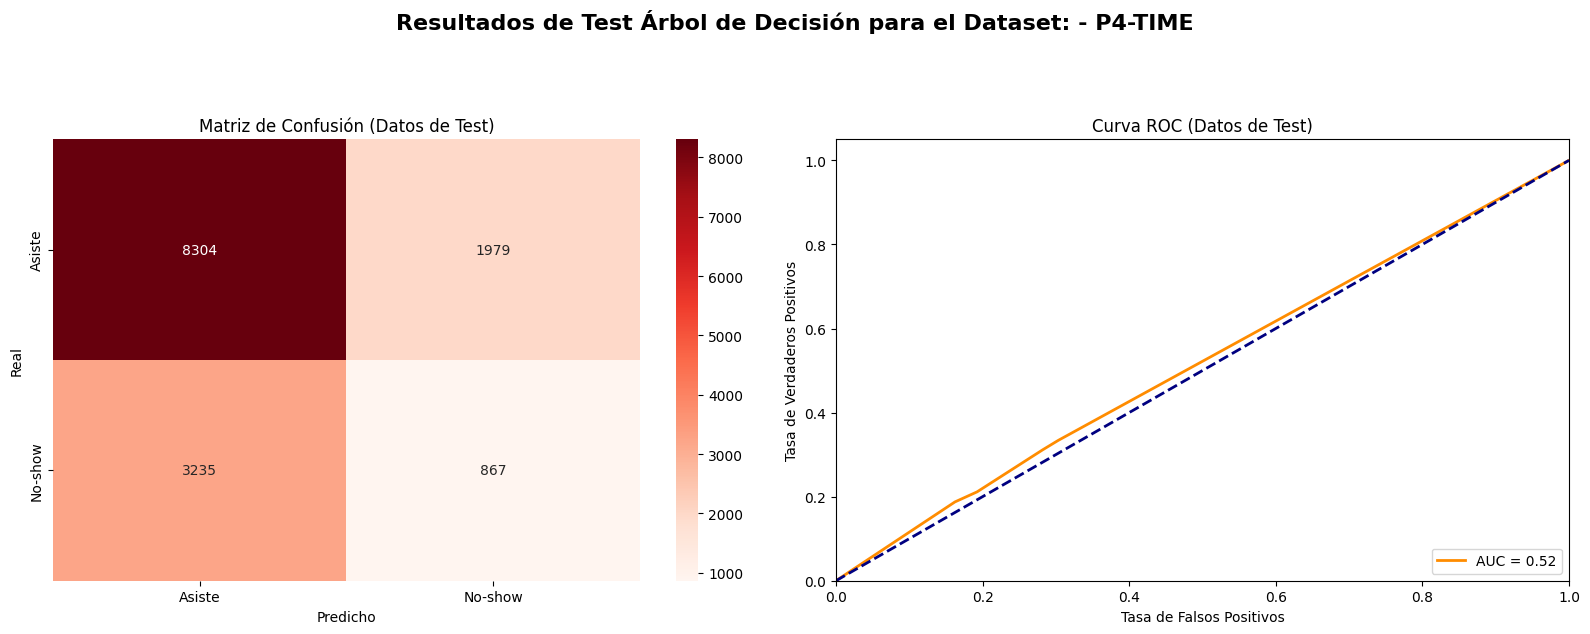

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.667014024575572
Precision (Datos de Train): 0.6470204178537512
Recall (Datos de Train): 0.38986445406101355
F1 Score (Datos de Train): 0.4865540404829387
[[35185  5947]
 [17060 10901]]


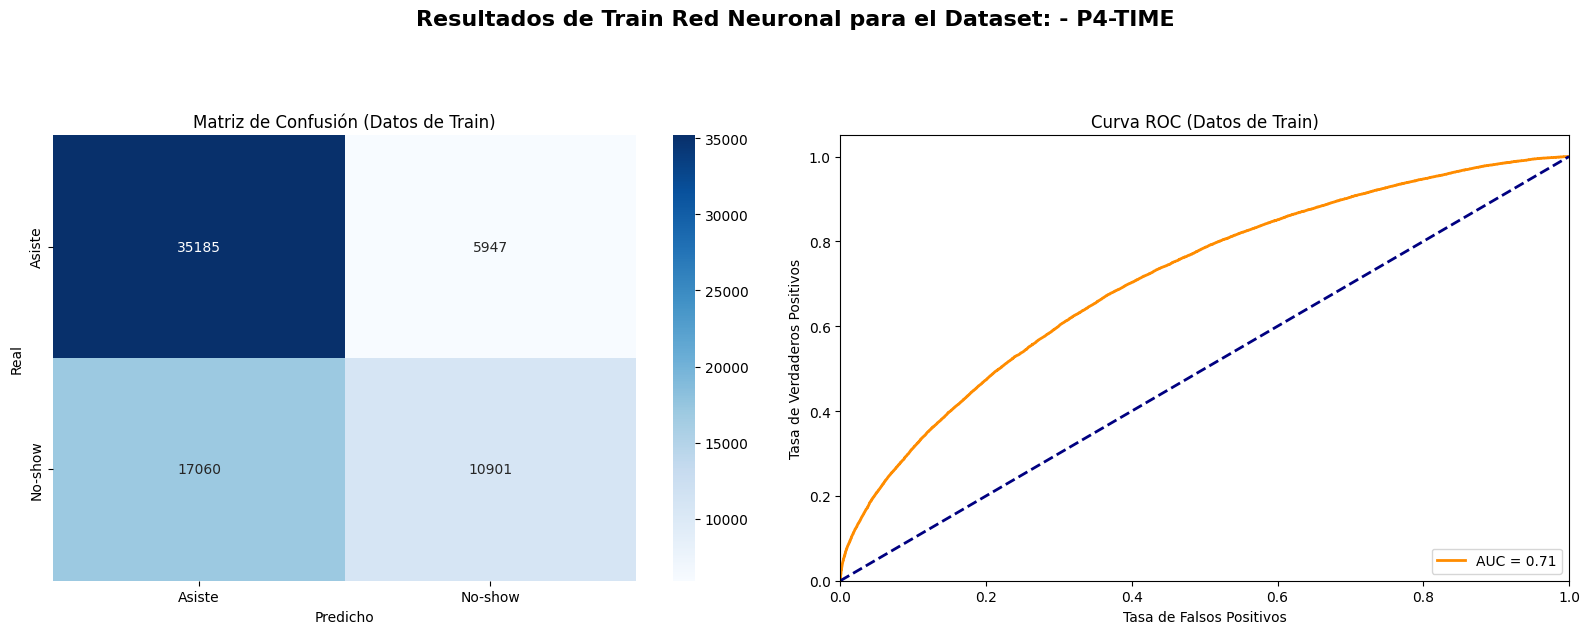

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6456725755995829
Precision (Datos de Test): 0.3621501801052923
Recall (Datos de Test): 0.31862506094588006
F1 Score (Datos de Test): 0.3389962391388925
[[7981 2302]
 [2795 1307]]


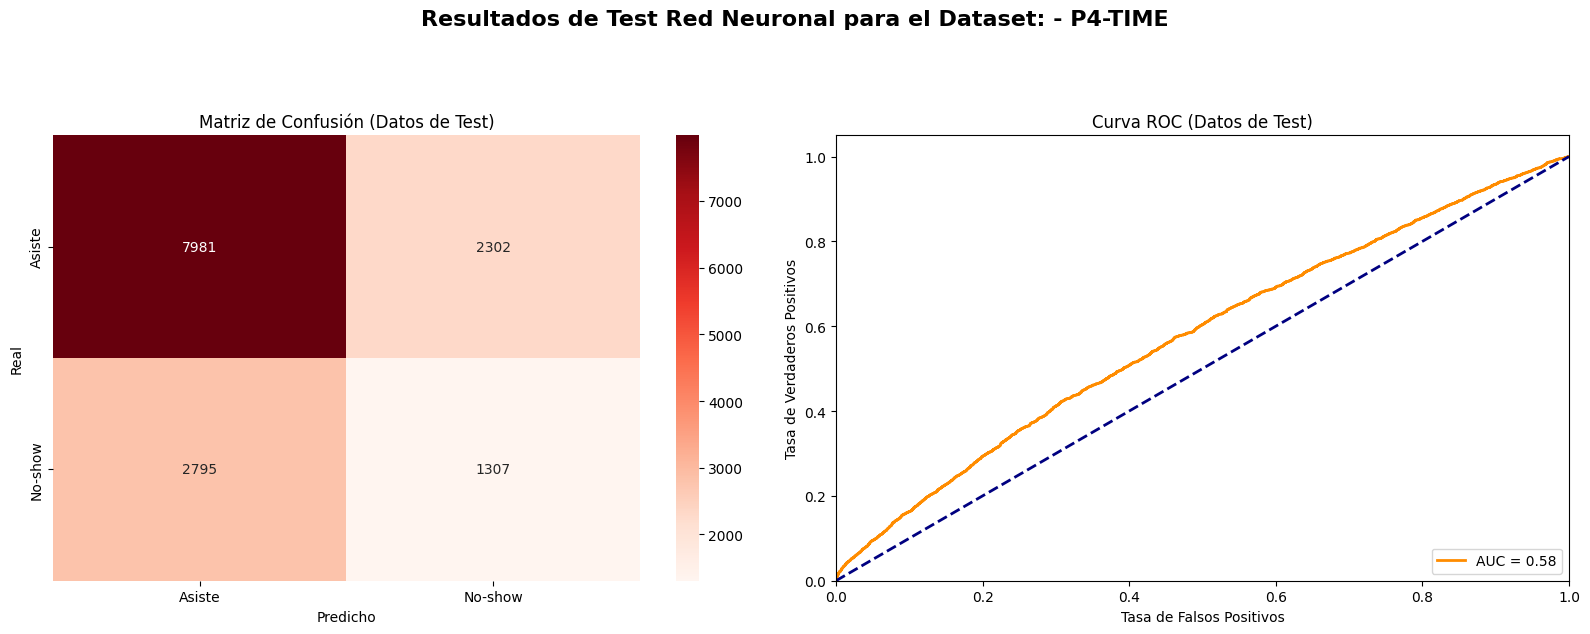


Ejecutando modelo para el dataset: P5-HEALTHCENTRE

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.6464358999413718
Precision (Datos de Train): 0.6442859358040006
Recall (Datos de Train): 0.4567063284878129
F1 Score (Datos de Train): 0.5345168604370688
[[36305  9176]
 [19771 16620]]


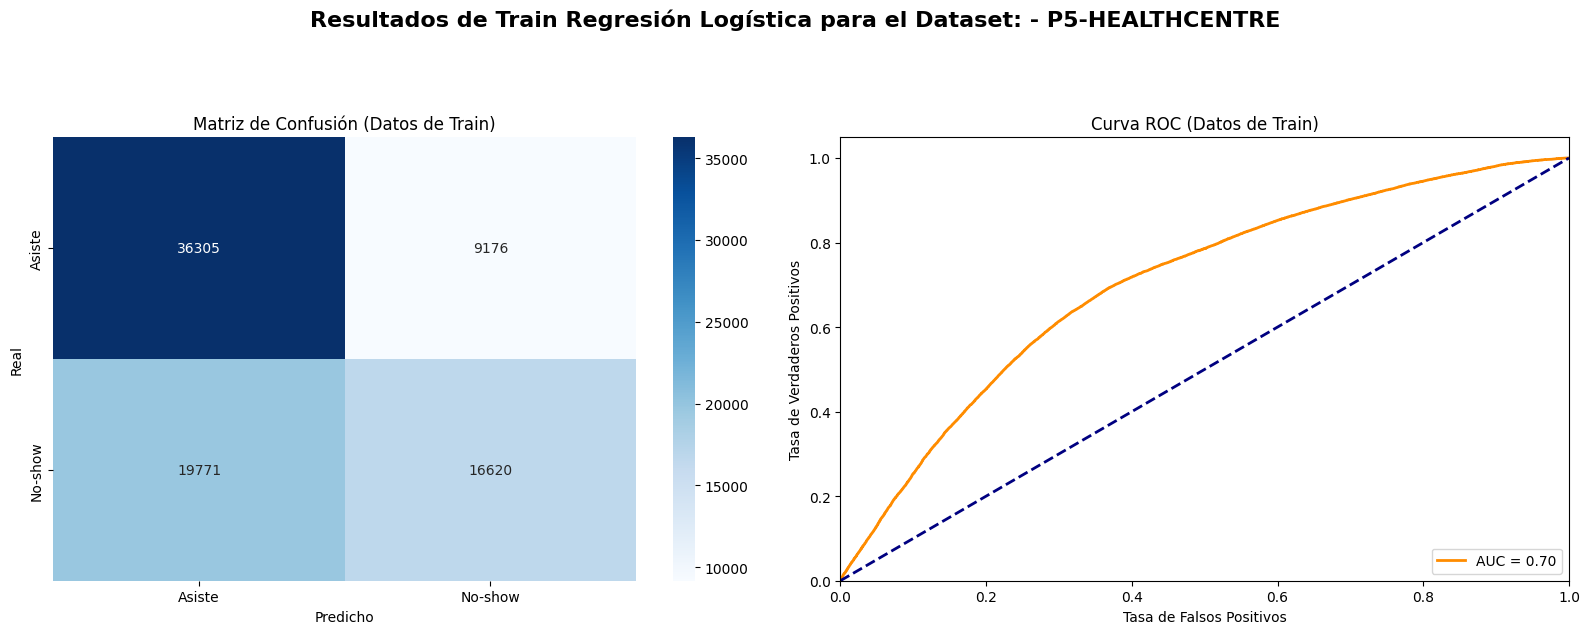

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6925502838320835
Precision (Datos de Test): 0.33113935542442124
Recall (Datos de Test): 0.5032769920662298
F1 Score (Datos de Test): 0.39945242984257356
[[8423 2947]
 [1440 1459]]


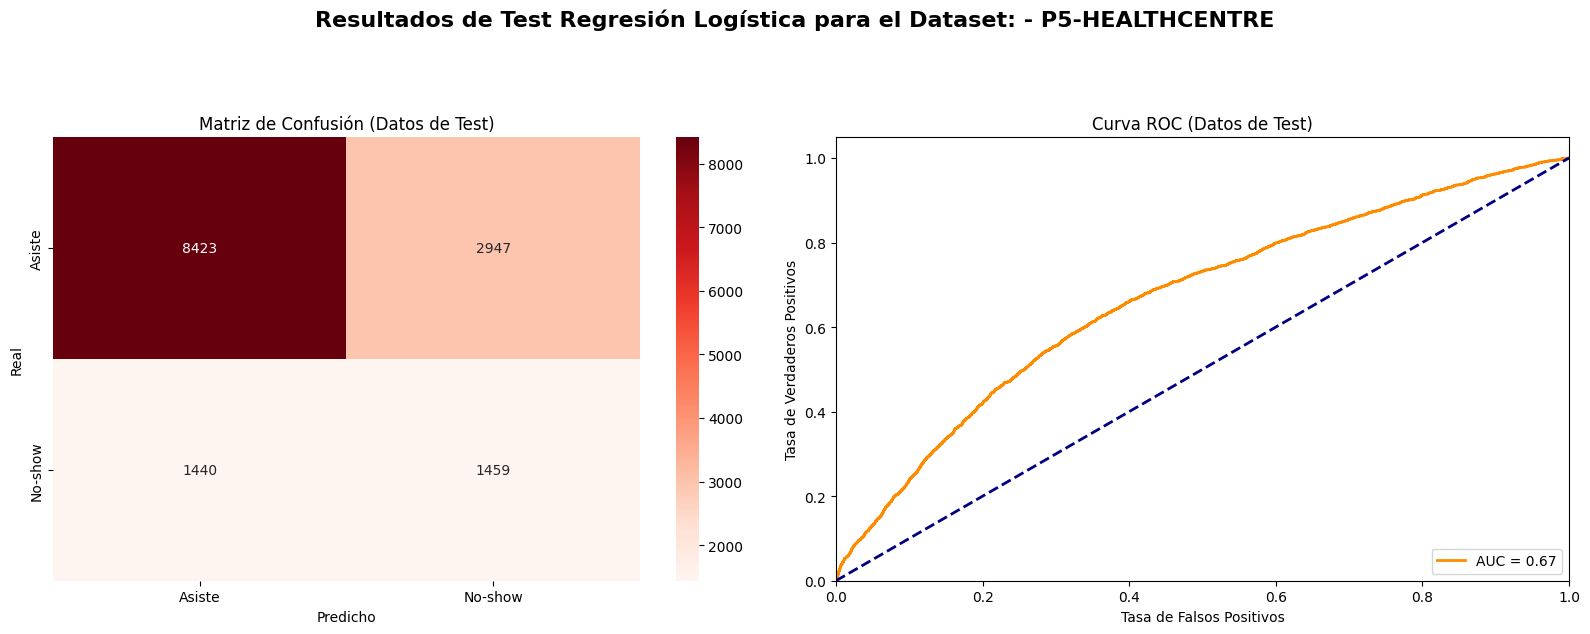

Modelo cargado exitosamente.
Mejores hiperparámetros cargados: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.9348373070158296
Precision (Datos de Train): 0.8962235264097984
Recall (Datos de Train): 0.9651562199444917
F1 Score (Datos de Train): 0.9294134769320331
[[41414  4067]
 [ 1268 35123]]


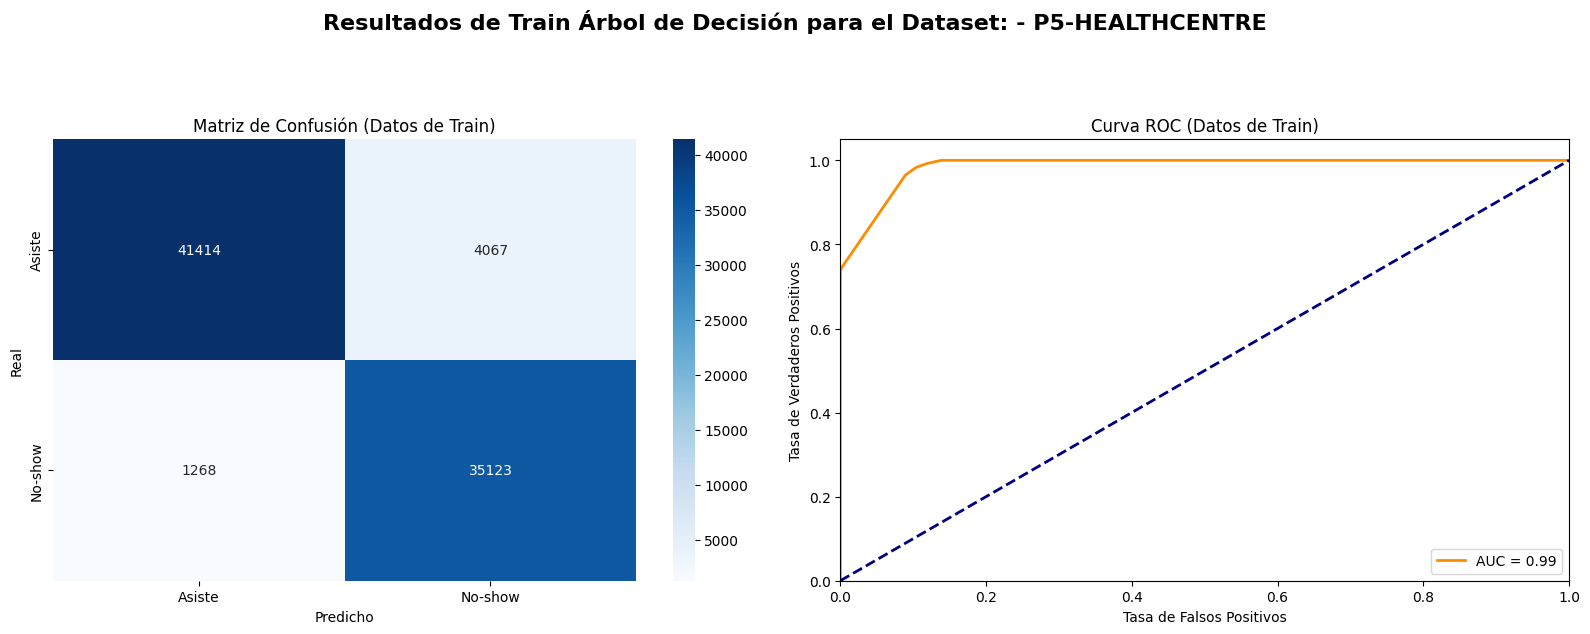

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.7029224192304997
Precision (Datos de Test): 0.32027896995708155
Recall (Datos de Test): 0.41186616074508453
F1 Score (Datos de Test): 0.36034404708012674
[[8836 2534]
 [1705 1194]]


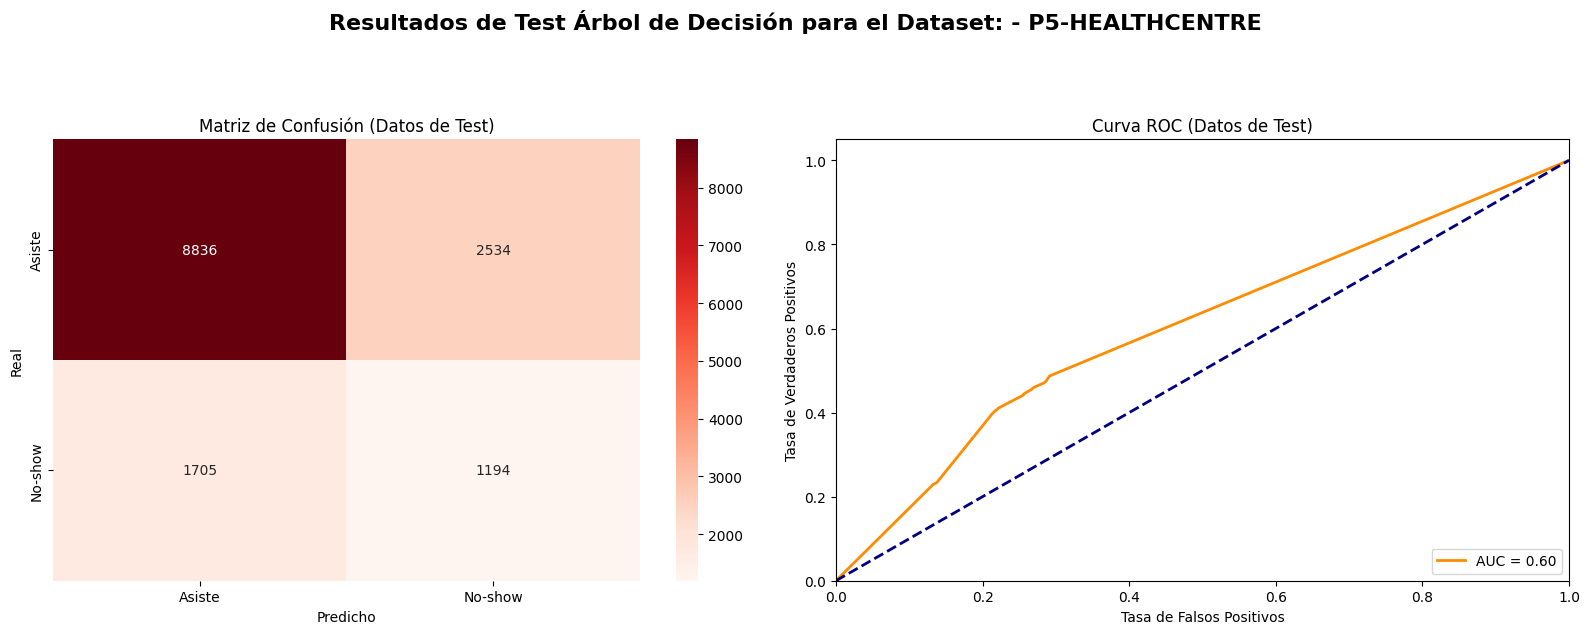

Modelo cargado exitosamente.
..................................
Resultados datos de entrenamiento:
Accuracy (Datos de Train): 0.7228722884502639
Precision (Datos de Train): 0.658521912166227
Recall (Datos de Train): 0.7820614987222115
F1 Score (Datos de Train): 0.7149945357936917
[[30723 14758]
 [ 7931 28460]]


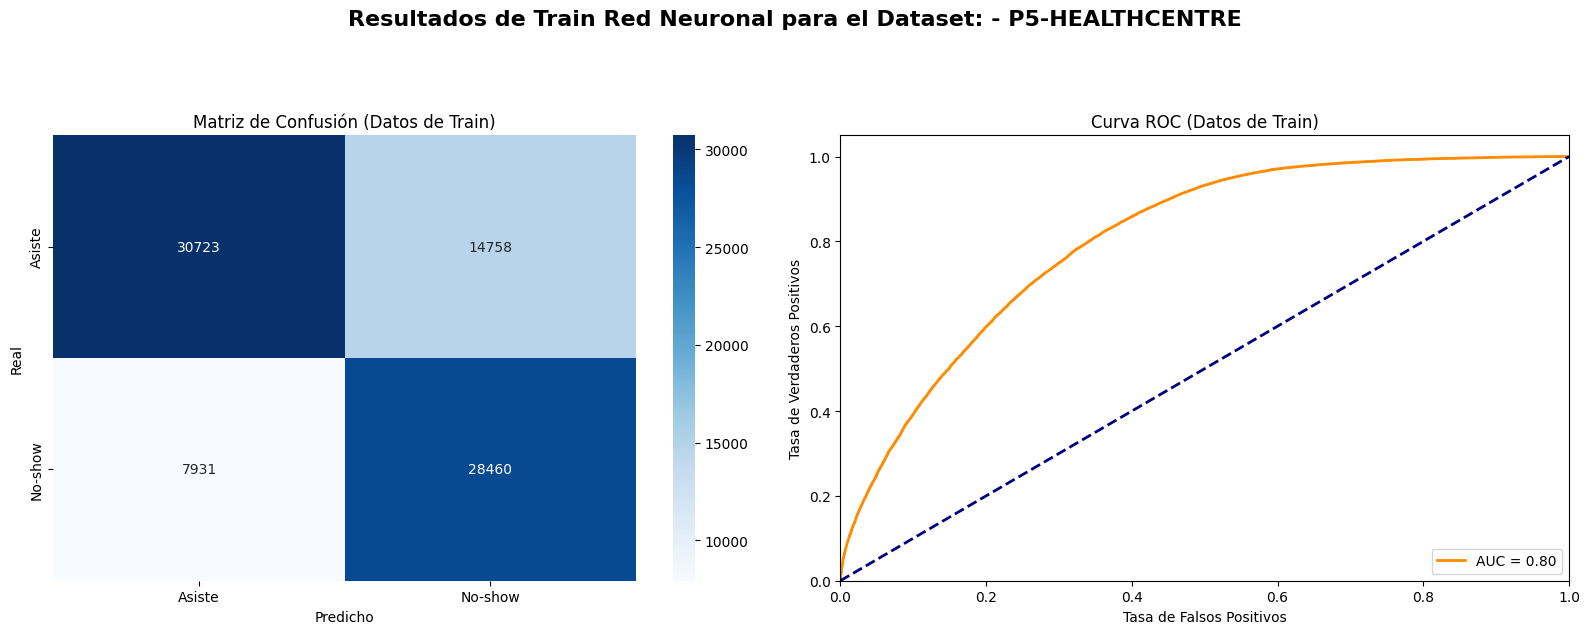

.........................
Resultados datos de test:
Accuracy (Datos de Test): 0.6102740206041068
Precision (Datos de Test): 0.3036873156342183
Recall (Datos de Test): 0.710244912038634
F1 Score (Datos de Test): 0.42545717532802974
[[6649 4721]
 [ 840 2059]]


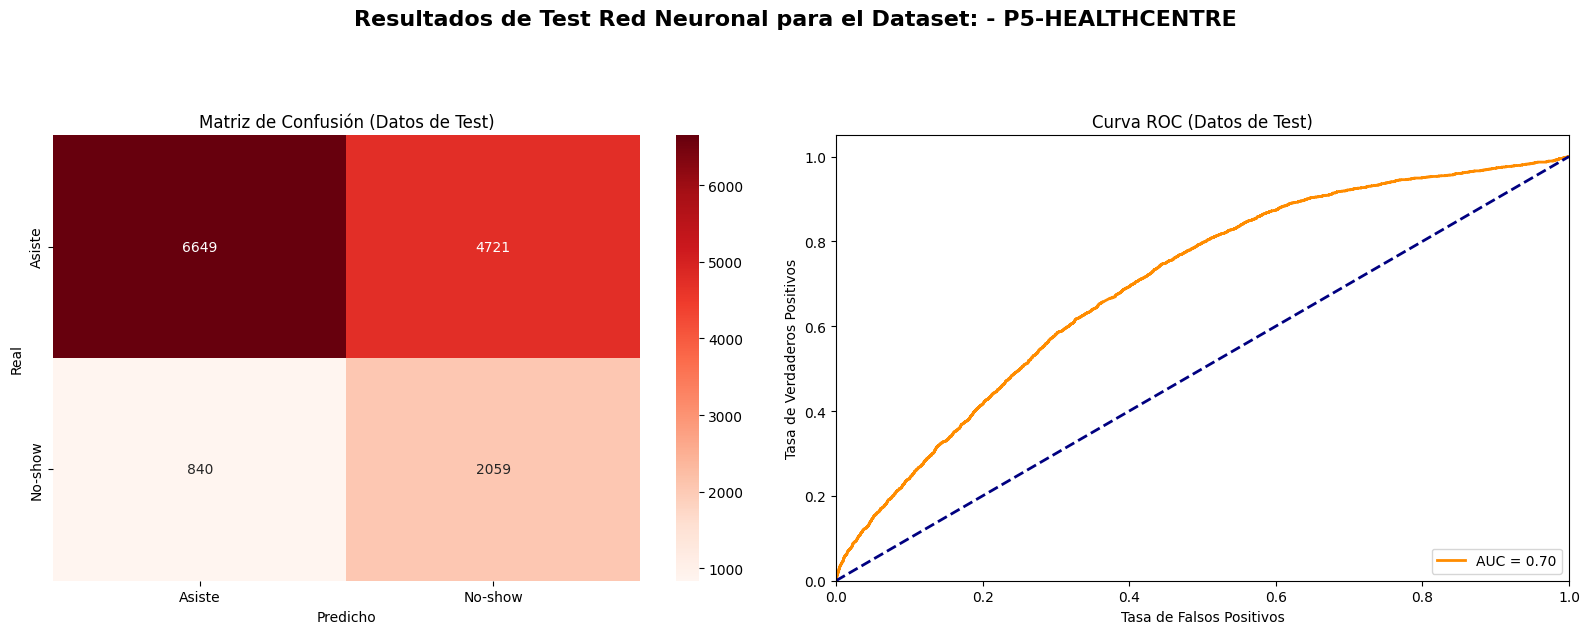

In [24]:
def load_data(file_path):
    return joblib.load(file_path)

# Listado de archivos
X_test_files = [
    "X_test_P1-ALL-ADASYN.pkl", "X_test_P1-ALL.pkl", "X_test_P2-NOCONDITIONS.pkl", 
    "X_test_P3-AGE.pkl", "X_test_P4-TIME.pkl", "X_test_P5-HEALTHCENTRE.pkl"
]

X_train_files = [
    "X_train_P1-ALL-ADASYN.pkl", "X_train_P1-ALL.pkl", "X_train_P2-NOCONDITIONS.pkl", 
    "X_train_P3-AGE.pkl", "X_train_P4-TIME.pkl", "X_train_P5-HEALTHCENTRE.pkl"
]

y_test_files = [
    "y_test_P1-ALL-ADASYN.pkl", "y_test_P1-ALL.pkl", "y_test_P2-NOCONDITIONS.pkl", 
    "y_test_P3-AGE.pkl", "y_test_P4-TIME.pkl", "y_test_P5-HEALTHCENTRE.pkl"
]

y_train_files = [
    "y_train_P1-ALL-ADASYN.pkl", "y_train_P1-ALL.pkl", "y_train_P2-NOCONDITIONS.pkl", 
    "y_train_P3-AGE.pkl", "y_train_P4-TIME.pkl", "y_train_P5-HEALTHCENTRE.pkl"
]

file_names = [
    "P1-ALL-ADASYN", "P1-ALL", "P2-NOCONDITIONS", 
    "P3-AGE", "P4-TIME", "P5-HEALTHCENTRE"
]

# Se cargan los archivos en un diccionario
data = {}
for file_list in [X_test_files, X_train_files, y_test_files, y_train_files]:
    for file_name in file_list:
        data[file_name] = load_data(file_name)

# Se crea bucle para analizar los datos con el modelo de PyTorch
for idx, (X_train_file, y_train_file, X_test_file, y_test_file) in enumerate(zip(X_train_files, y_train_files, X_test_files, y_test_files)):
    try:
        if X_train_file in data and y_train_file in data and X_test_file in data and y_test_file in data:
            X_train = data[X_train_file]
            y_train = data[y_train_file]
            X_test = data[X_test_file]
            y_test = data[y_test_file]

            dataset_name = file_names[idx]
            titulo = f"\n{'='*40}\nEjecutando modelo para el dataset: {dataset_name}\n{'='*40}\n"
            print(titulo)
            # Se ejecuta el modelo de regresión logística
            execute_model_logistic_regression(X_train, y_train, X_test, y_test, dataset_name)
            # Se ejecuta el modelo de árbol de decisión
            execute_model_decision_tree(X_train, y_train, X_test, y_test, dataset_name)
            # Se ejecuta el modelo de PyTorch
            execute_model_pytorch(X_train, y_train, X_test, y_test, device='cuda', dataset_name=dataset_name)
        else:
            print(f"Archivos correspondientes no encontrados para {X_train_file}. Omitiendo este archivo.")
    except KeyError as e:
        print(f"Error: {e} - La clave no existe en el diccionario 'data'. Omitiendo este archivo.")
